## Group 27: Benedetto & Collura

2017 Edition

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [1]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
import seaborn as sns

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 8.0)

<div class="alert alert-warning">In addition to the default file, we use two .csv files with several info about all the airports and carriers, in order to be able to use them later on in this notebook. For the airports, we have decided to use this dataset before seeing the other airport dataset proposed at the end of the standard notebook, and afterwards we chose not to change it, because this one has more information for each airport. </div>

In [2]:
sqlContext = SQLContext(sc)

input_path_airports = "./airports.csv"
input_path_carriers = "./carriers.csv"

airports_df = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='true', delimiter=',', inferSchema=True) \
    .load(input_path_airports)
airports_df.select('name', 'city', 'country', 'code', 'lat', 'lon', 'timezone').show(5, False)

carriers_df = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='true', delimiter=',', inferSchema=True) \
    .load(input_path_carriers)
carriers_df.show(5, False)

+-------------------------------------------+------------+----------------+----+-------------+--------------+--------+
|name                                       |city        |country         |code|lat          |lon           |timezone|
+-------------------------------------------+------------+----------------+----+-------------+--------------+--------+
|Goroka Airport                             |Goroka      |Papua New Guinea|GKA |-6.0816898346|145.391998291 |10.0    |
|Madang Airport                             |Madang      |Papua New Guinea|MAG |-5.2070798874|145.789001465 |10.0    |
|Mount Hagen Kagamuga Airport               |Mount Hagen |Papua New Guinea|HGU |-5.826789856 |144.296005249 |10.0    |
|Nadzab Airport                             |Nadzab      |Papua New Guinea|LAE |-6.569803    |146.725977    |10.0    |
|Port Moresby Jacksons International Airport|Port Moresby|Papua New Guinea|POM |-9.4433803558|147.2200012207|10.0    |
+-------------------------------------------+---

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [3]:
print("Number of rows before cleaning:", raw_data.count())

Number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [4]:
# extract the header
header = raw_data.take(1)[0]

def process_row(line):
    row = list(map(lambda x: x if x != 'NA' else '', line.split(',')))
    return row

# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(process_row)
        )
        
print("Number of rows after cleaning:", cleaned_data.count())

Number of rows after cleaning: 5180048


<div class="alert alert-warning">

Reasonably, we lost only one row: the header.

</div>

## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [5]:
# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(),  True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [6]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0]  else None,
            int(cols[1])  if cols[1]  else None,
            int(cols[2])  if cols[2]  else None,
            int(cols[3])  if cols[3]  else None,
            int(cols[4])  if cols[4]  else None,
            int(cols[5])  if cols[5]  else None,
            int(cols[6])  if cols[6]  else None,
            int(cols[7])  if cols[7]  else None,
            cols[8]       if cols[8]  else None,
            cols[9]       if cols[9]  else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [7]:
# create dataframe df
df = sqlContext\
        .createDataFrame(cleaned_data_to_columns, airline_data_schema)\
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay', 'distance', 'carrier', 'tail_number', 'src_airport', 'dest_airport')\
        .cache()
df.show(10)

+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+-----------+------------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|carrier|tail_number|src_airport|dest_airport|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+-----------+------------+
|1994|    1|           7|          5|                     900|                  1003|           -9|     290|     US|       null|        CLT|         ORF|
|1994|    1|           8|          6|                     900|                  1003|          -11|     290|     US|       null|        CLT|         ORF|
|1994|    1|          10|          1|                     900|                  1003|           20|     290|     US|       null|        CLT|         ORF|
|1994|    1|          11|          2|                     900|              

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [8]:
src_airports  = df.groupBy('src_airport').count().count()
dest_airports = df.groupBy('dest_airport').count().count()
print("Number of origin airports:      ", src_airports)
print("Number of destination airports: ", dest_airports)

Number of origin airports:       224
Number of destination airports:  225


<div class="alert alert-warning">
There is a differece between the number of source airport and destination airport, thus there is - at least - one airport present in the dataset only as destination airport (there could be more, actually, in case some airport is only a source airport).
</div>
<div class="alert alert-info">
QUESTION: Which airports are present in the dataset only as destination airport?
</div>

In [9]:
list_src_airports  = [ x[:][0] for x in df.select('src_airport').drop_duplicates().collect() ]
list_dest_airports = [ x[:][0] for x in df.select('dest_airport').drop_duplicates().collect() ]

only_dest_airport = [ x for x in list_dest_airports if x not in list_src_airports ]
airports_df[airports_df.code.isin(only_dest_airport)].select('code','name', 'country').show(truncate=False)

+----+----------------------------------------------+-------------+
|code|name                                          |country      |
+----+----------------------------------------------+-------------+
|GUM |Antonio B. Won Pat International Airport      |Guam         |
|BFI |Boeing Field King County International Airport|United States|
+----+----------------------------------------------+-------------+



<div class="alert alert-warning">These two airports are present in the dataset only as destination airport, therefore there must be one airport present only as source airport.</div>
<div class="alert alert-info">
QUESTION: Which airport is present only as source airport in the dataset?
</div>

In [10]:
only_src_airport = [ x for x in list_src_airports if x not in list_dest_airports ]
airports_df[airports_df.code.isin(only_src_airport)].select('code','name', 'country').show(truncate=False)

+----+----------------------------+------------------------+
|code|name                        |country                 |
+----+----------------------------+------------------------+
|SPN |Saipan International Airport|Northern Mariana Islands|
+----+----------------------------+------------------------+



#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [11]:
carriers = df.groupBy('carrier').count().collect()
print("Number distinct carriers:", len(carriers))

carriers_codes = [ x[0] for x in carriers ]
carriers_df[carriers_df.Code.isin(carriers_codes)].show(truncate=False)

Number distinct carriers: 10
+----+-----------------------------------------------------------------------------------+
|Code|Description                                                                        |
+----+-----------------------------------------------------------------------------------+
|AA  |American Airlines Inc.                                                             |
|AS  |Alaska Airlines Inc.                                                               |
|CO  |Continental Air Lines Inc.                                                         |
|DL  |Delta Air Lines Inc.                                                               |
|HP  |America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.) |
|NW  |Northwest Airlines Inc.                                                            |
|TW  |Trans World Airways LLC                                                            |
|UA  |United Air Lines Inc.                                  

<div class="alert alert-warning">Limiting at year 1994 there are only 10 distinct carriers.</div>

#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>
<div class="alert alert-warning">
Since there was no explict request, we decided to consider as flights all the flights departing earlier that 6am, thus, we are considering 12 hours.
</div>

In [12]:
num_night_flights = df\
      .filter( ((col('scheduled_departure_time') >= 1800) & (col('scheduled_departure_time') <= 2400))\
             | ((col('scheduled_departure_time') >= 0) & (col('scheduled_departure_time') < 600)) )\
      .count()
print("Number of scheduled night flights:", num_night_flights)
print("Percentage of night flights: %.4f" %(100*num_night_flights/df.count()))

Number of scheduled night flights: 1159716
Percentage of night flights: 22.3881


<div class="alert alert-warning">It is not a huge percentage. Indeed, over the 12 hours considered as *night* is scheluded only the 22.3881% of flights. In the following part of the notebook, we will show that this is mainly due to the (almost) absence of flights between 1am and 6am</div>

### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


+-----+------+
|month| count|
+-----+------+
|    1|423861|
|    2|386954|
|    3|435516|
|    4|420995|
|    5|436432|
|    6|426490|
|    7|443736|
|    8|451086|
|    9|430861|
|   10|449369|
|   11|428227|
|   12|446521|
+-----+------+



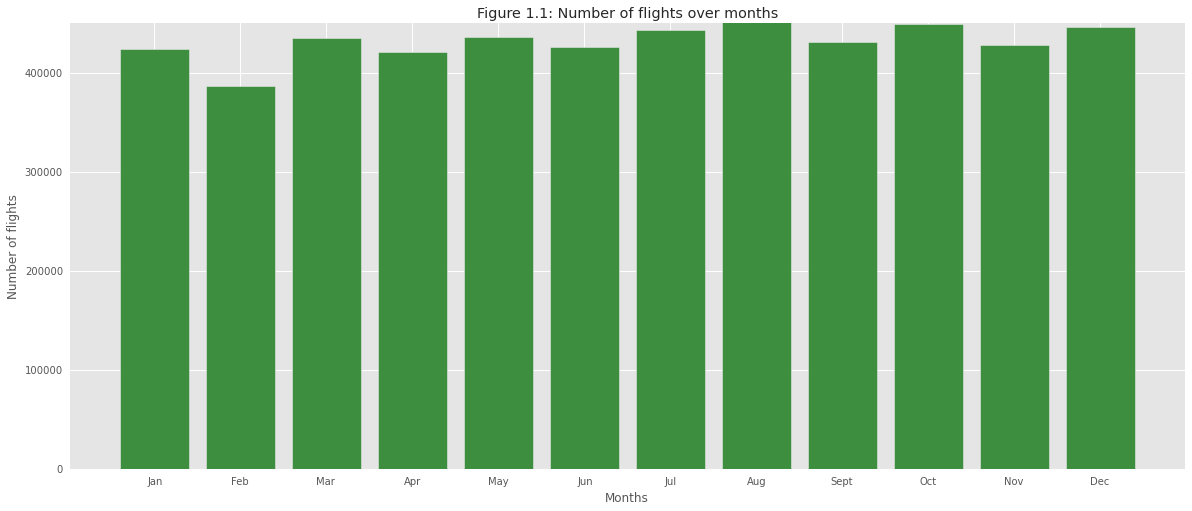

In [13]:
statistic_month = df.groupBy('month').count().orderBy('month')
statistic_month.show()

pdf = pd.DataFrame(data=statistic_month.collect())
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1.1: Number of flights over months')
plt.grid(True, which="both", ls="-")
plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
plt.xticks(pdf[0], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning"> We can observe that the most busiest months are August, October and December. While we were guessing to see August and December, as they are the most common vacation periods (and they are 31 days long), we were kind of surprised seeing October as one of the most busiest month throughout the year.
An important aspect to consider in this plot is that it just consider the total amount of flights, without taking into account the actual number of days in the month: from this point of view it is obvious that February is the month with less flights, and the busiest months are all 31-days long. Because of this problem we should also consider as plot the averge number of flights per day in each month, in order to get the real values for the busiest airports.</div>
<div class="alert alert-info">
QUESTION: Considering the average per day, which are the month(s) with the biggest number of flights?
</div>

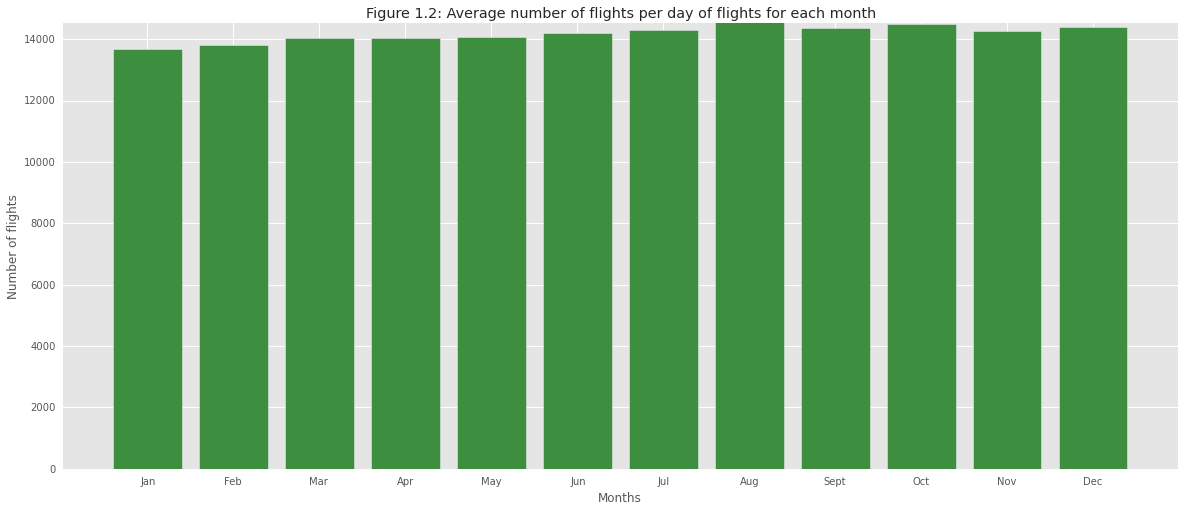

In [14]:
days_per_month = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
days = udf(lambda month: days_per_month[month], IntegerType())
statistic_month_avg = statistic_month.withColumn('avg', col('count') / days(col('month')))

pdf = pd.DataFrame(data=statistic_month_avg.collect())
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1.2: Average number of flights per day of flights for each month')
plt.grid(True, which="both", ls="-")
plt.bar(pdf[0], pdf[2], align='center', color='#3E8E40')
plt.xticks(pdf[0], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning">

It's easy to see the difference between this plot and the previous one: in this one we are printing the average number of flights per day for each month and we can see that August and October are the busiest months. It is also interesting to notice that there is a quite big difference between December and January (that is the least busy month) even though they are close from the temporal point of view. Probably this is related to the increase in the number of flights during the holiday period. We can also observe that the low values of February were not only related to the fact that February was 28-days long in 1994: indeed, we can see that Febrary is the second to last month in this plot as well, only January has a lower amount of flights.

</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

+-----------+------+
|day_of_week| count|
+-----------+------+
|          1|754636|
|          2|756532|
|          3|756864|
|          4|751537|
|          5|751531|
|          6|695245|
|          7|713703|
+-----------+------+



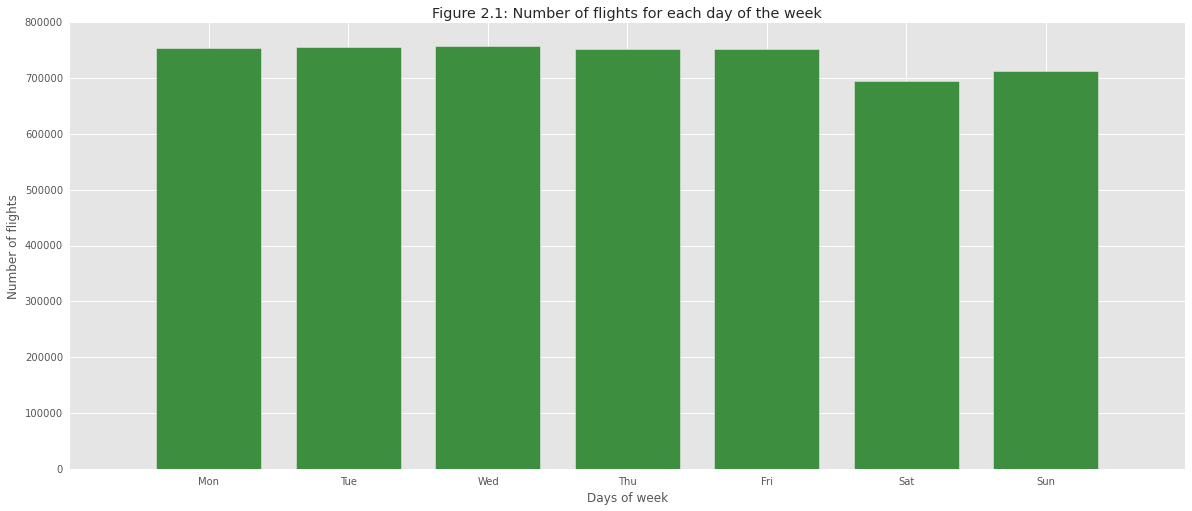

In [15]:
statistic_day_of_week = df.groupBy('day_of_week').count().orderBy('day_of_week')
statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_day_of_week.collect())
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2.1: Number of flights for each day of the week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])

plt.bar(pdf[0], pdf[1], align='center', width=0.75, color='#3E8E40')

plt.xticks(pdf[0], day_of_week_label)
plt.show()

<div class="alert alert-warning"> We can see that the weekend are, on average, less busy that the working days (ad the difference is quite big!). Anyway, this plot performs an average over the whole year, without considering the difference between months, thus we decided to deal with this aspect as well. </div>
<div class="alert alert-info">
QUESTION: Does this relation change accordingly to the month of the year? Plot this relation for each month and interpret them and the differences.
</div>

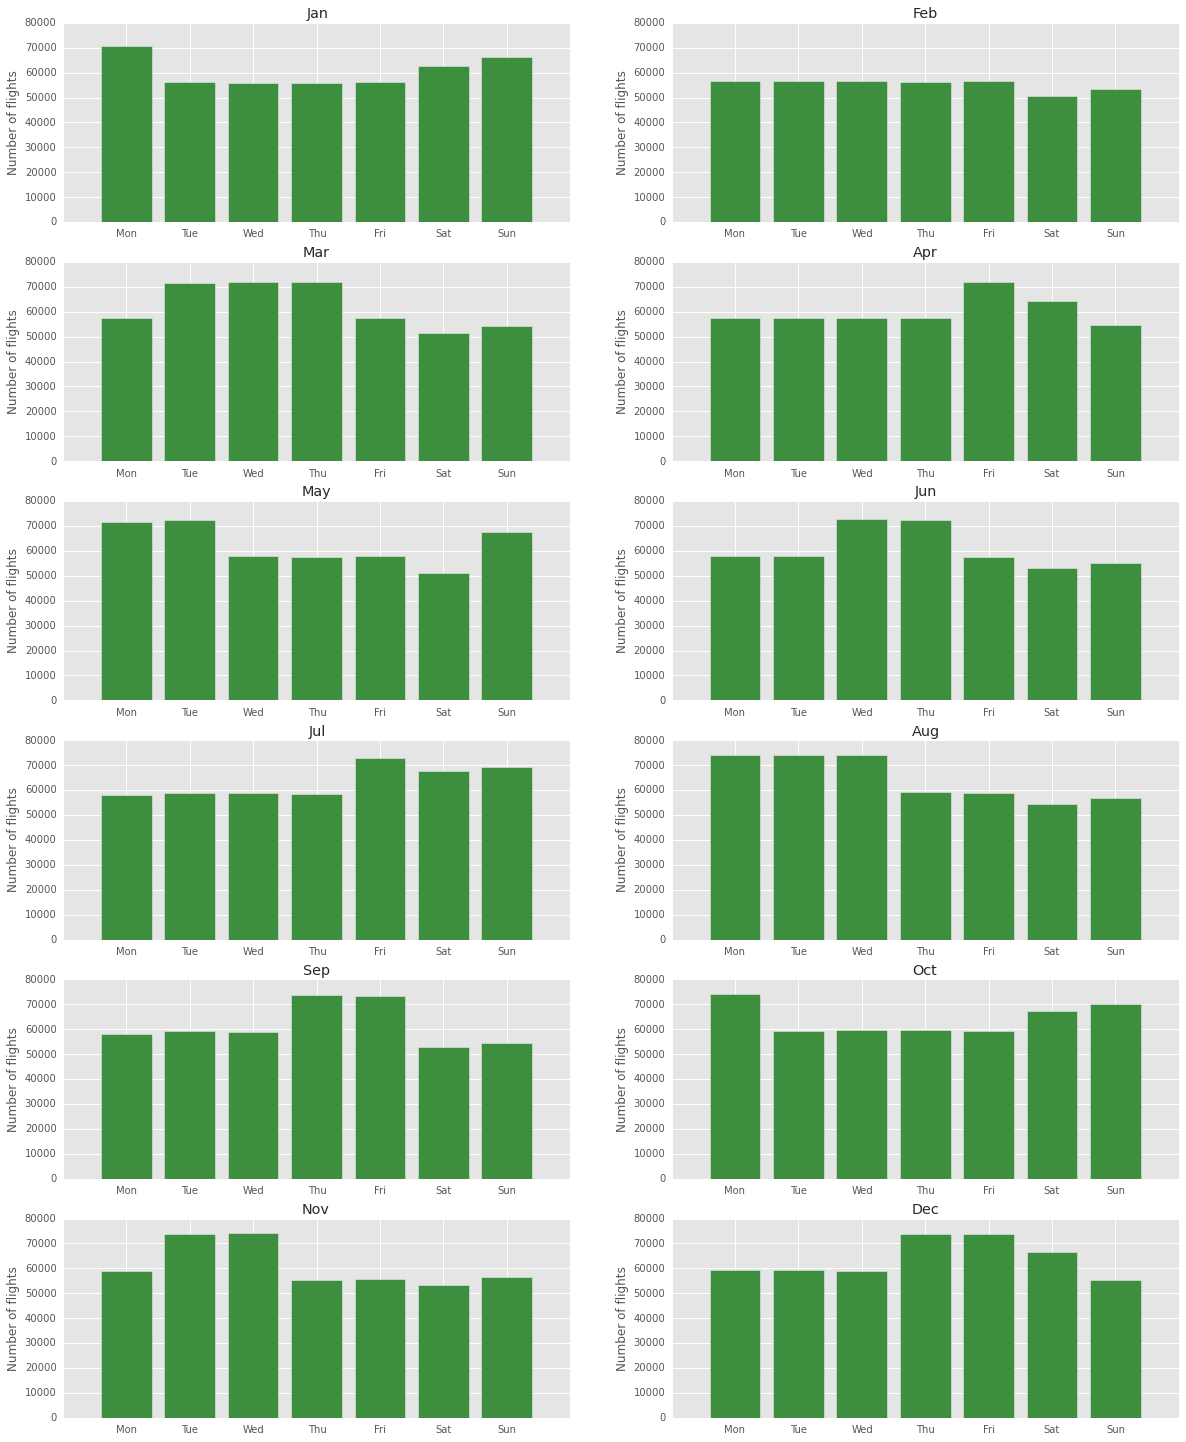

In [16]:
#Plotting as the previous one but doing it for each month, we should get 12 plots, we could put them in a 4x3 table.
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize = (20.0, 25.0))

for i in range (1,13):
    statistic_day_of_week = df.filter(col('month') == i).groupBy('day_of_week').count().orderBy('day_of_week')
    pdf = pd.DataFrame(data=statistic_day_of_week.collect())
    plt.subplot(6, 2, i)
    plt.ylabel("Number of flights")
    plt.title(months[i-1])
    plt.grid(True,which="both",ls="-")
    map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
    day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])
    plt.ylim(0, 80000)
    plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')

    plt.xticks(pdf[0], day_of_week_label)

plt.show()

<div class="alert alert-warning">
It is very interesting to notice that the "formula" *week-days are busier than weekends* appears not to be always true. For instance, while this relation looks to be still valid for February, March, June, August, September and November (and the difference is not as big as before), we can see that in the other months there is some interesting behaviour.
<br />
Anyway, we should be very careful while analyzing these 12 plots: we have printed the number of flights for each day of the week for each month, but the number of days is not always the same!! Indeed, if we look at February we can see that the "formula" looks to be valid and February is the only month where each day of week occurs the same number of times.
If we look at all the other months, we can see that the peaks correspond to the days of the week that occured more times than the others.
<br /><br />

We made this comment to underline how we should be careful while analyzing data and the plots we get out of them, because they could be very misleading.
</div>

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

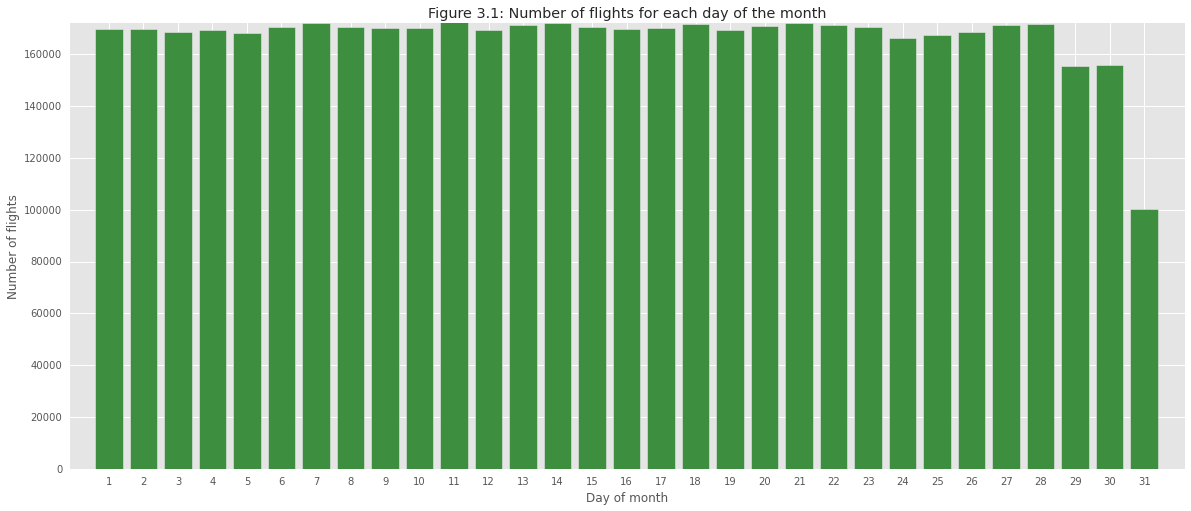

In [17]:
statistic_day_of_month = df.groupBy('day_of_month').count().orderBy('day_of_month')
#statistic_day_of_month.show()
pdf = pd.DataFrame(data=statistic_day_of_month.collect())

# plot bar chart
plt.title('Figure 3.1: Number of flights for each day of the month')
plt.ylabel('Number of flights')
plt.xlabel('Day of month')
plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
plt.xticks(pdf[0])
plt.margins(0.025, 0)
plt.show()

<div class="alert alert-warning"> In this plot it can be seen easily a problem analogous to the one we have had with the months: it's obvious that the 31st will have the lowest value, since  only 7 months out of 12 have 31 days. For the same reason, the 29th and 30th have values a bit lower that all the previous days (February is missing). We decided to plot also the amount of flights per day for each month, in order to see the actual impact of holidays, for instance, on the number of flights.</div>
<div class="alert alert-info">
QUESTION: How many flights per day of month, for each month?
</div>

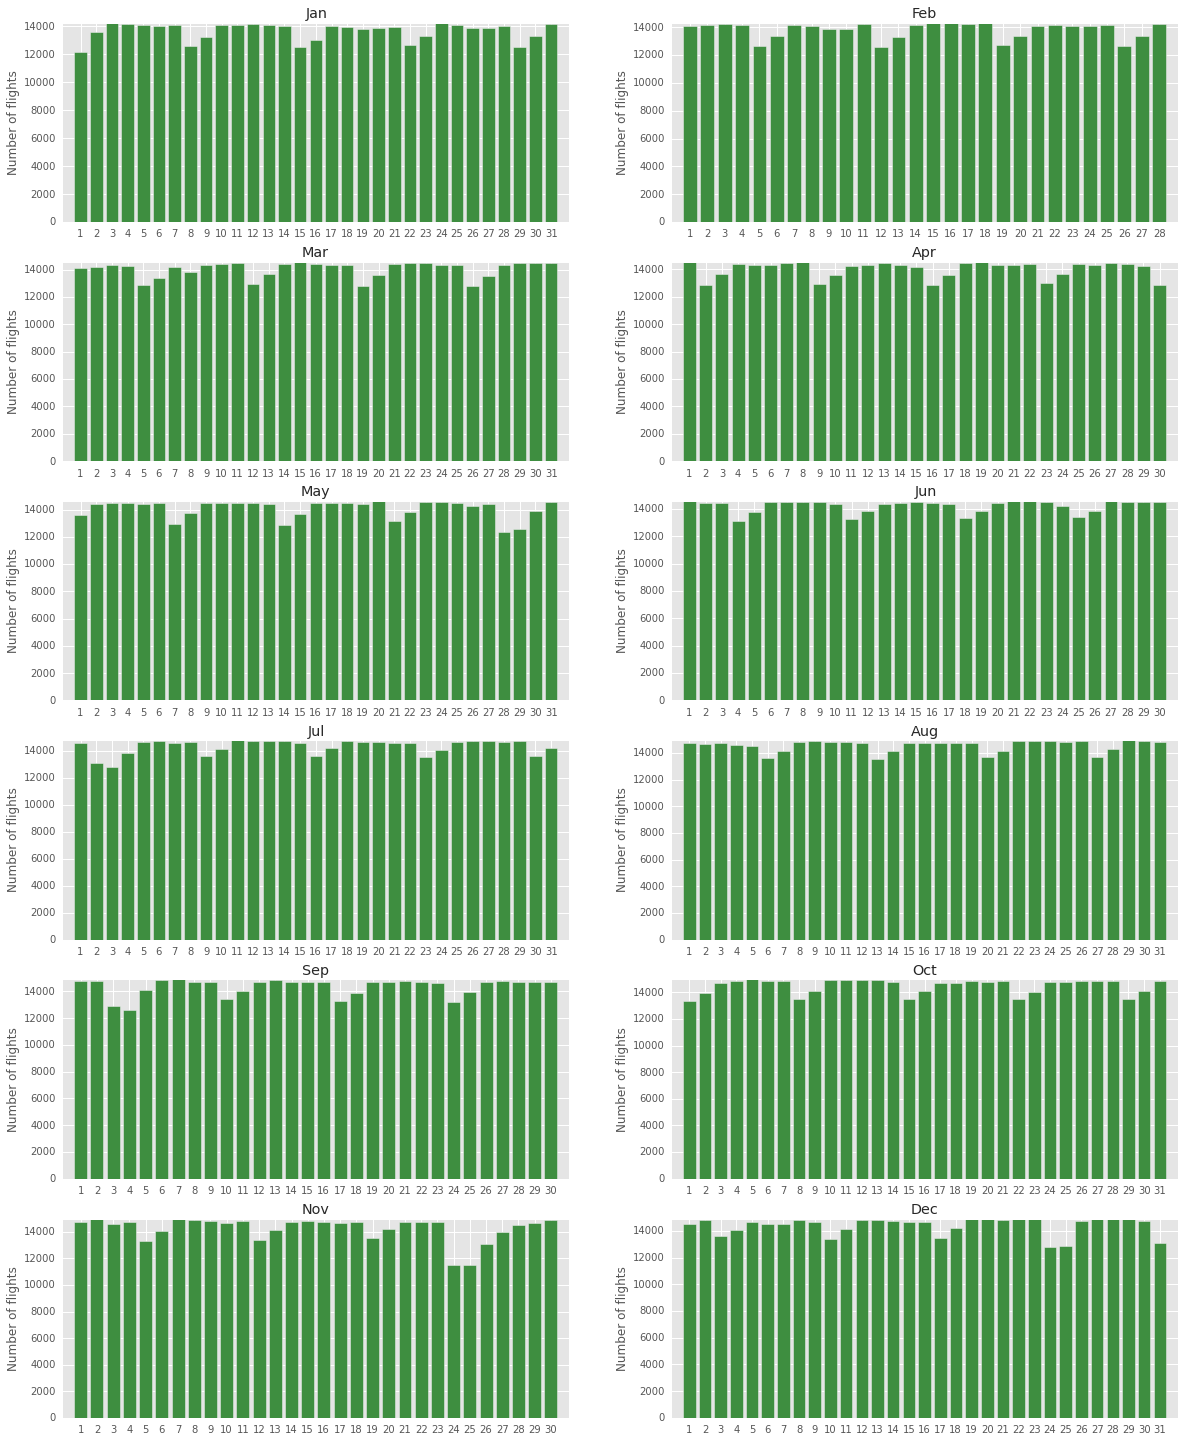

In [18]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize = (20.0, 25.0))

for i in range (1,13):
    statistic_day_of_month_per_month = df.filter(col('month') == i)\
                                         .groupBy('day_of_month').count().orderBy('day_of_month')
    pdf = pd.DataFrame(data=statistic_day_of_month_per_month.collect())
    plt.subplot(6,2,i)
    plt.ylabel("Number of flights")
    plt.title(months[i-1])
    plt.grid(True,which="both",ls="-")
    plt.margins(0.025, 0)
    plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
    plt.xticks(pdf[0])

plt.show()

<div class="alert alert-warning"> The differences are a bit smaller than what we expect, but it is easy to see the pattern, with weekends that are less busy than the other days. It is also clearly visible the smaller values in the 24th and 25th December (there was both the effect of the holiday itself and that it was a weekend). It is also easy to spot the impact of *Thanksgiving* day and *Black Friday* on the number of flights, looking at the drops the 24th and 25th November. We can see, in July, that there is a strange behaviour in the "standard weekend pattern", between the 3rd and the 5th, because of the *Independence Day*. There is also a small anomaly in correspondence of the *Memorial day* (30th May), but this one is way smaller than the others. 
<br/><br/>
The previous graphs are pretty interesting and let us spot the feature we analyzed, anyway focusing only on the number of flights could be misleading. Thus, we decided to plot a similar graph but, instead of plotting the total number of flights, we are plotting the ratio between the number of flights in a given day and the average number of flights in that day of week.
</div>


In [19]:
#computing the average number of flights for each day of the week.
avg_day_of_week = df.groupBy('day_of_week', 'day_of_month', 'month').count()\
                        .groupBy('day_of_week').mean('count')\
                        .withColumnRenamed('avg(count)', 'average')\
                        .orderBy('day_of_week')
avg_day_of_week.show()

+-----------+------------------+
|day_of_week|           average|
+-----------+------------------+
|          1| 14512.23076923077|
|          2|14548.692307692309|
|          3|14555.076923076924|
|          4|14452.634615384615|
|          5| 14452.51923076923|
|          6|13117.830188679245|
|          7|13725.057692307691|
+-----------+------------------+



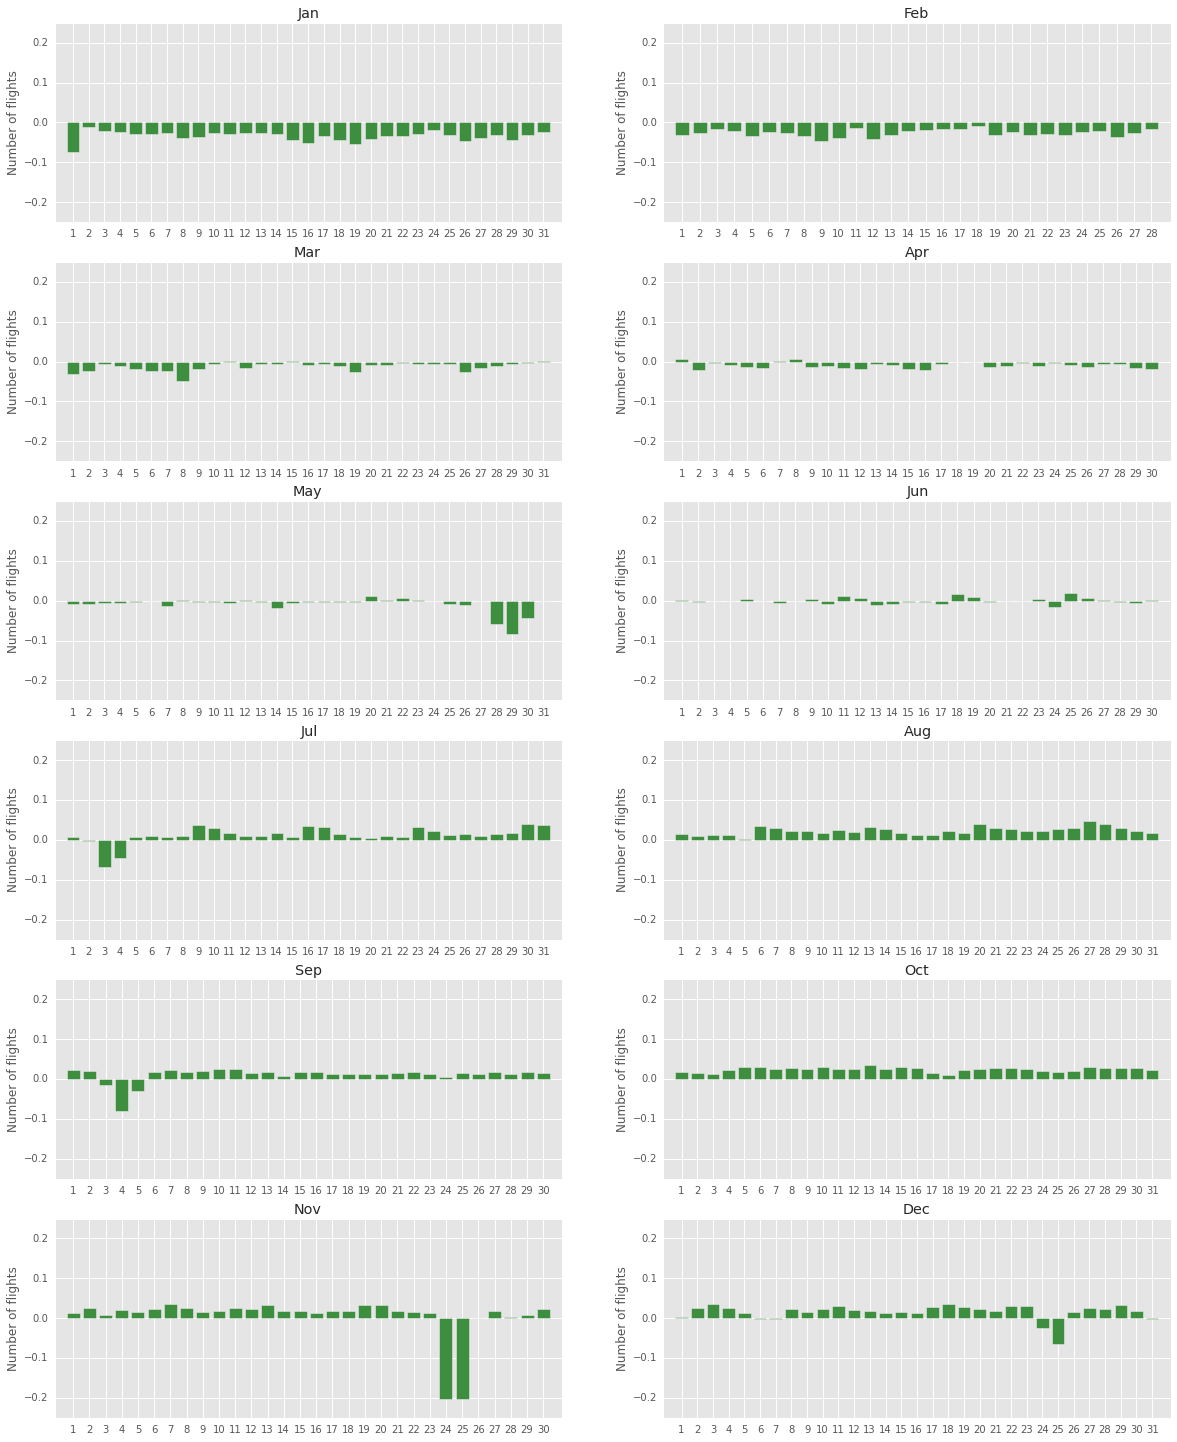

In [20]:
#plotting the ratio
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize = (20.0, 25.0))

for i in range (1,13):
    statistic_day_of_month_per_month = df.filter(col('month') == i)\
                                         .groupBy('day_of_month', 'day_of_week')\
                                         .agg(count('*').alias('total'))\
                                         .join(avg_day_of_week, 'day_of_week')\
                                         .withColumn('avg_day', col('total') / col('average') - 1)\
                                         .select('day_of_month', 'avg_day')\
                                         .orderBy('day_of_month')
    pdf = pd.DataFrame(data=statistic_day_of_month_per_month.collect())
    plt.subplot(6,2,i)
    plt.ylabel("Number of flights")
    plt.title(months[i-1])
    plt.grid(True,which="both",ls="-")
    plt.margins(0.025, 0)
    plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
    plt.xticks(pdf[0])
    plt.ylim(-0.25, 0.25)

plt.show()

<div class="alert alert-warning">
Here it's way easier to spot some of the peaks we have seen before: the one corresponding to *Black Friday* and *Thanksgiving day* is really evident, while the one related to *Christmas* is a bit smaller than we expected. There is also a down-peak corresponding to the *Independence day* (4th July).
</div>

<div class="alert alert-info">
QUESTION: Let's take a look at the number of flights for each hour of day.
</div>

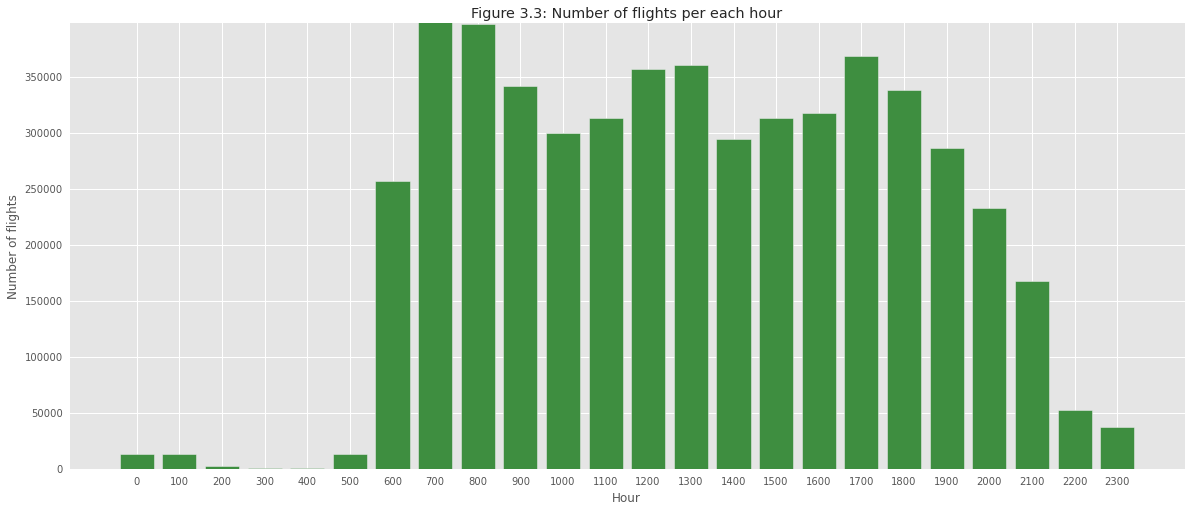

In [21]:
statistic_hour_of_day = df.withColumn('hour_of_day', 
                                      (df.scheduled_departure_time - df.scheduled_departure_time % 100) % 2400)\
                            .groupBy('hour_of_day').count().orderBy('hour_of_day')
#statistic_hour_of_day.show(24)

pdf = pd.DataFrame(data=statistic_hour_of_day.collect())
# plot bar chart
plt.title('Figure 3.3: Number of flights per each hour')
plt.ylabel('Number of flights')
plt.xlabel('Hour')
plt.bar(pdf[0], pdf[1], align='center', width=80, color='#3E8E40')
plt.xticks(pdf[0])
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning">
In this plot we can see how many flights are planned for each hour of the day. We can observe the huge peak in the morning (between 7am and 8am), probably due to business related flights (this is coherent with the result found for the number of flights per weekday), and very low values during night hours: especially between 2am and 4am, the number of flights is close to 0. Anyway, we expected the evening peak a bit later, around 7pm, while it is at 5pm. As we did previously, in order to get a better insight of the data, we decided to plot this same plot but focusing separately on each day of the week.
</div>
<div class="alert alert-info">
QUESTION: Does the number of fligths per hour of day change depending on the day of the week?
</div>

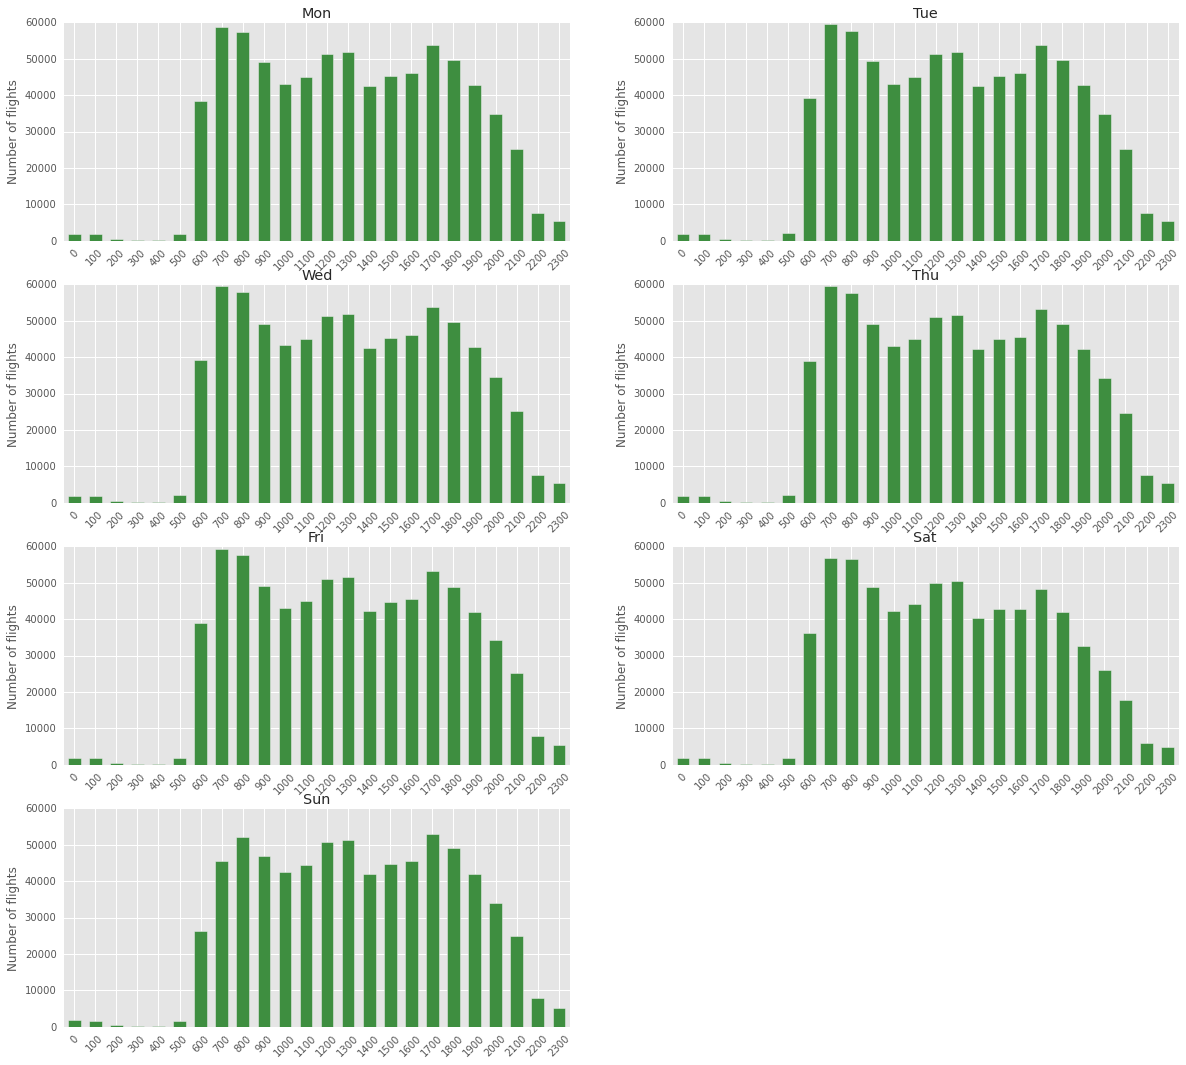

In [22]:
#Plot as the previous one but also grouping on week days
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig = plt.figure(figsize = (20.0, 18.0))

for i in range (1,8):
    statistic_hour_of_day_weekday = df.filter(col('day_of_week') == i)\
                            .withColumn('hour_of_day', 
                                      (df.scheduled_departure_time - df.scheduled_departure_time % 100) % 2400)\
                            .groupBy('hour_of_day').count().orderBy('hour_of_day')
    #statistic_hour_of_day_weekday.show()
    pdf = pd.DataFrame(data=statistic_hour_of_day_weekday.collect())
    plt.subplot(4,2,i)
    plt.ylabel("Number of flights")
    plt.title(weekdays[i-1])
    plt.grid(True,which="both",ls="-")
    plt.ylim(0, 60000)
    # plot bar chart
    plt.bar(pdf[0], pdf[1], align='center', width=60, color='#3E8E40')
    plt.margins(0.01, 0)
    plt.xticks(pdf[0], rotation= 45)

plt.show()

<div class="alert alert-warning">
We can see that the behaviour is very similar to the one we got for the whole week. Especially the nocturnal behaviour is almost the same, with very small differences. One of the only differences that we can spot is in the plot for Sunday: we can see that there is not a the usual peak around 7am, while the busiest hour are 8am, 5pm and around lunch time. This behaviour is another proof that the higher values for the week-day are due to business-related flights.
</div>

#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

In [8]:
# consider outbound flights
stat_src = (df
             .groupBy(df.src_airport)
             .agg(count('*').alias('outbound'))
             .cache()
            )
    
# consider inbound flights
stat_dest = (df
             .groupBy(df.dest_airport)
             .agg(count('*').alias('inbound'))
             .cache()
            )

# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, col('src_airport') == col('dest_airport'))

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['outbound'] + stat_airports['inbound'])
                            # select top airpoint in termns of number of flights
                            .select(['src_airport', 'total', 'outbound', 'inbound']).orderBy(desc('total'))
                            .cache()
                        )

stat_airport_traffic.join(airports_df, col('src_airport') == col('code'), how = 'left_outer')\
    .select('src_airport', 'total', 'name', 'city').show(20, False)

+-----------+------+----------------------------------------------------------+-----------------+
|src_airport|total |name                                                      |city             |
+-----------+------+----------------------------------------------------------+-----------------+
|ORD        |561461|Chicago O'Hare International Airport                      |Chicago          |
|DFW        |516523|Dallas Fort Worth International Airport                   |Dallas-Fort Worth|
|ATL        |443074|Hartsfield Jackson Atlanta International Airport          |Atlanta          |
|LAX        |306453|Los Angeles International Airport                         |Los Angeles      |
|STL        |304409|Lambert St Louis International Airport                    |St. Louis        |
|DEN        |285526|Denver International Airport                              |Denver           |
|PHX        |280560|Phoenix Sky Harbor International Airport                  |Phoenix          |
|DTW        |276272|

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


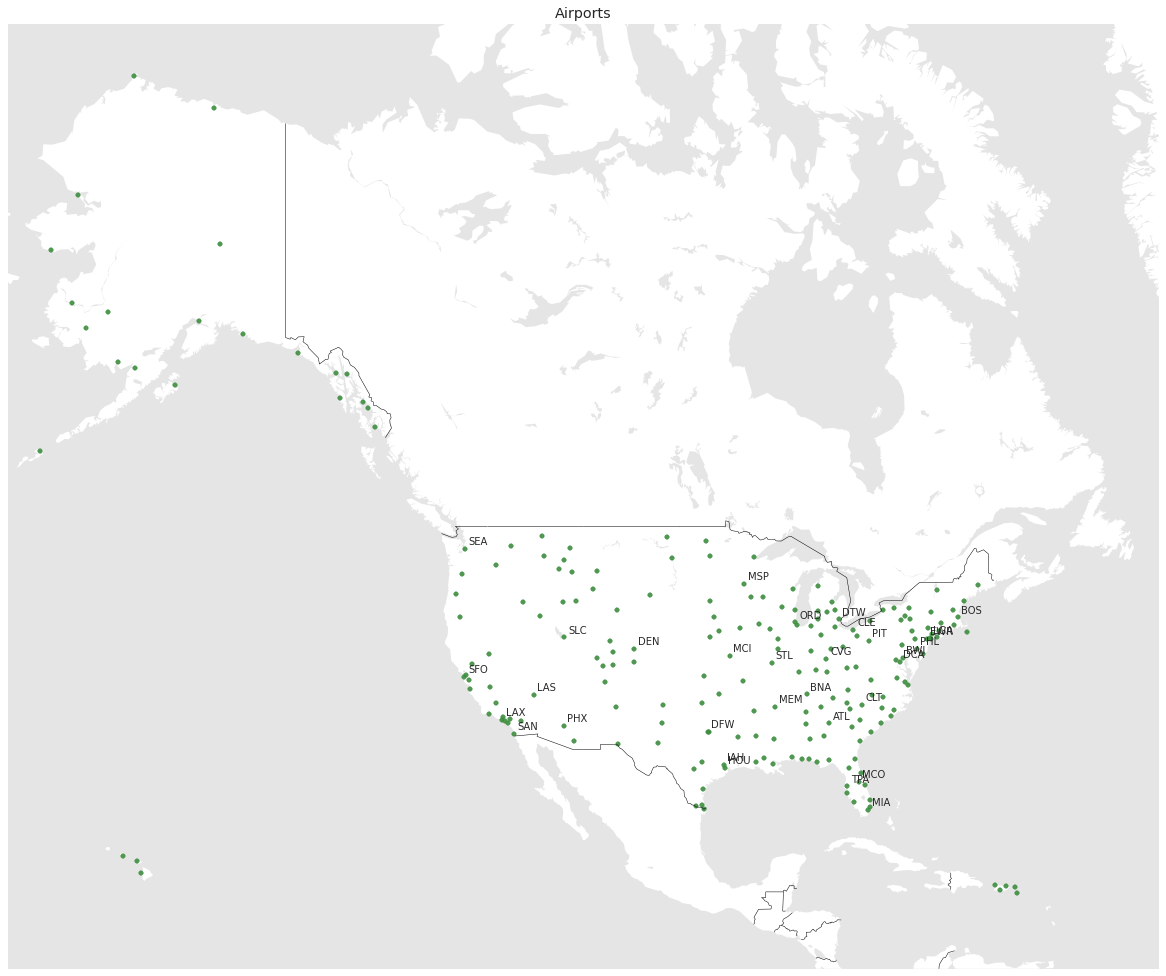

In [9]:
airports_pos = stat_airport_traffic.join(airports_df, col('src_airport') == col('code'), how = 'left_outer')\
    .select('lon', 'lat', 'code', 'total')

# create new figure, axes instances.
fig=plt.figure(figsize=(20, 20))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-170.,llcrnrlat=10.,urcrnrlon=-50.,urcrnrlat=73.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')

pdf = airports_pos.toPandas()

lon = pdf.lon.values.tolist()
lat = pdf.lat.values.tolist()

x, y = m(lon, lat)
m.scatter(x, y, alpha=0.9, color='#3E8E40')

for lon, lat, city, total in pdf.values:
    # draw the city name in a yellow (shaded) box
    if total > 100000:
        x, y = m(lon, lat)
        plt.text(x + 50000, y + 50000, city)


m.fillcontinents(color='#ffffff', zorder=0)
m.drawcountries()

ax.set_title('Airports')
plt.show()

<div class="alert alert-warning">
In this map we plotted all the airports present in the dataset and, for the busiest ones, also the code. We can also notice that, actually, the data include also Puerto Rico, that is an unincorporated territory of the US.
</div>

<div class="alert alert-info">
QUESTION: are the busiest airports busy both for inbound and outbound flights?
</div>

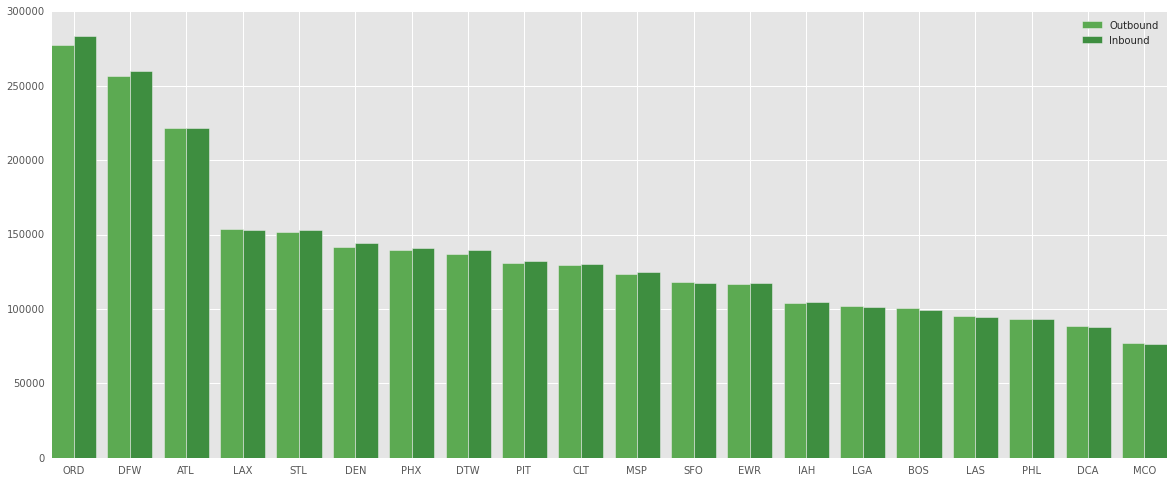

In [25]:
pdf = pd.DataFrame(data = stat_airport_traffic.take(20))
x = np.arange(0, 20)
fig, ax = plt.subplots() # Create matplotlib figure
plt.setp(ax, xticks=x, xticklabels=pdf[0])
width = 0.4
ax.bar(x - width, pdf[2], width=width, color='#5CAA52', label='Outbound')
ax.bar(x, pdf[3], width=width, color='#3E8E40', label='Inbound')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)

plt.show()

<div class="alert alert-warning">
We can see that the two values are mostly balanced on each airport: there are no airports where the number of inbound flights is way higher than the number of outbound flights (or viceversa).
</div>

<div class="alert alert-info">
QUESTION: Which are the most connected airports?
</div>

In [10]:
most_connected_airports = df.groupBy('src_airport', 'dest_airport').count().orderBy(desc('count')).cache()
most_connected_airports.show()

+-----------+------------+-----+
|src_airport|dest_airport|count|
+-----------+------------+-----+
|        SFO|         LAX|17526|
|        LAX|         SFO|17428|
|        LAX|         PHX|13303|
|        PHX|         LAX|13250|
|        ORD|         MSP|13231|
|        MSP|         ORD|13149|
|        LAX|         LAS|13056|
|        LAS|         LAX|12644|
|        PHX|         LAS|11593|
|        LAS|         PHX|11375|
|        HOU|         DAL|11198|
|        LGA|         ORD|11169|
|        ORD|         LGA|10720|
|        DFW|         IAH|10633|
|        IAH|         DFW|10372|
|        DAL|         HOU|10256|
|        ORD|         DFW| 9684|
|        BOS|         EWR| 9581|
|        EWR|         BOS| 9460|
|        DFW|         ORD| 9398|
+-----------+------------+-----+
only showing top 20 rows



<div class="alert alert-warning">
It interesting to notice that the busiest airport (ORD) doesn't appear many times in this table, and this made us think that probably it is connected to many distinct airports but there are not many flights to/from each one of them. On the other hand, an airport as LAX is probably connected with less airports but each connection is very busy.
</div>

+-----------+------------+------------+-------------+---------------+-------------+-----+
|src_airport|dest_airport|     src_lon|      src_lat|       dest_lon|     dest_lat|count|
+-----------+------------+------------+-------------+---------------+-------------+-----+
|        SFO|         LAX|    -122.375|37.6189994812|   -118.4079971|  33.94250107|17526|
|        LAX|         SFO|-118.4079971|  33.94250107|       -122.375|37.6189994812|17428|
|        LAX|         PHX|-118.4079971|  33.94250107|-112.0120010376| 33.434299469|13303|
+-----------+------------+------------+-------------+---------------+-------------+-----+
only showing top 3 rows



/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


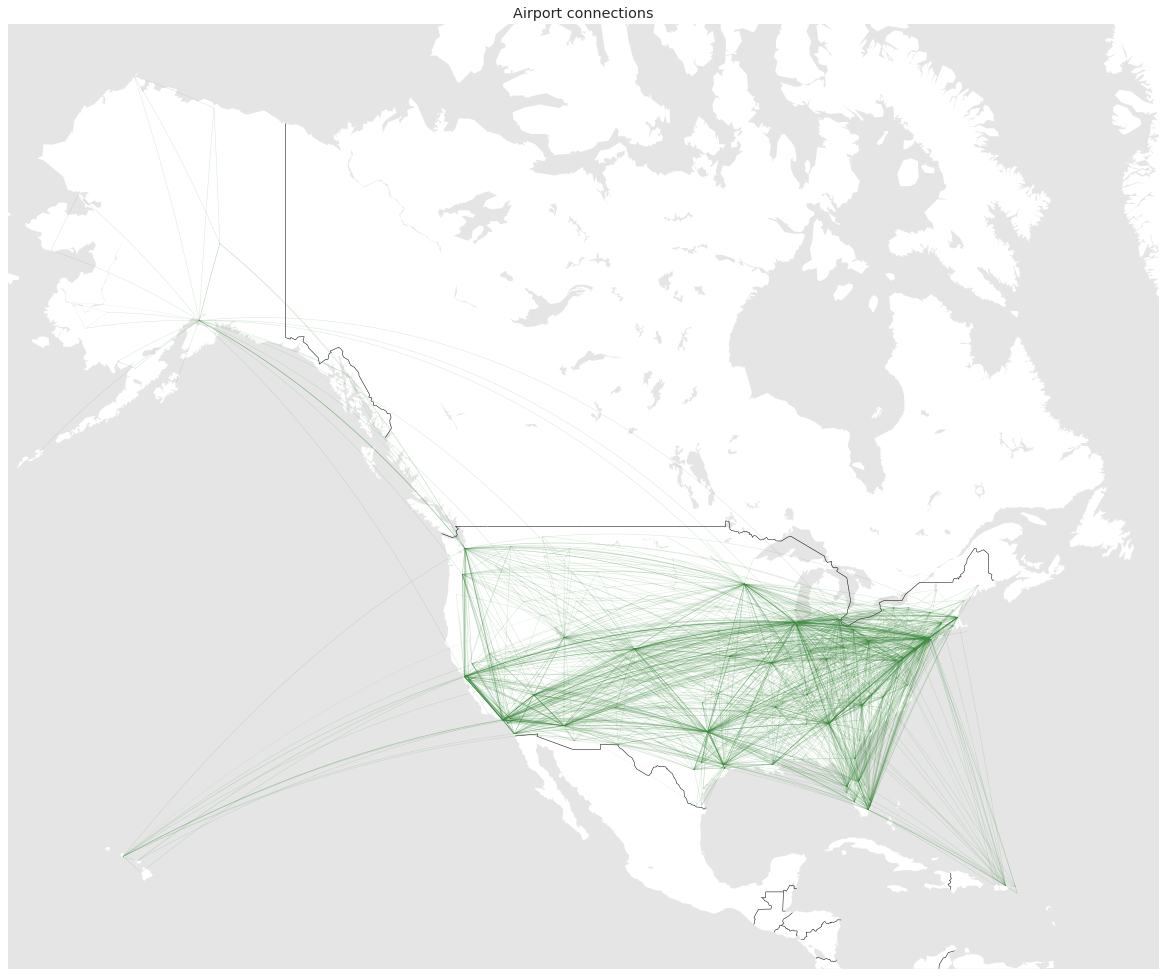

In [32]:
most_connected_airports_pos = most_connected_airports\
                                    .join(airports_df, col('src_airport') == col('code'), how = 'left_outer')\
                                    .select('src_airport', 'dest_airport', 'lon', 'lat', 'count')\
                                    .withColumnRenamed('lon', 'src_lon').withColumnRenamed('lat', 'src_lat')\
                                    .join(airports_df, col('dest_airport') == col('code'), how = 'left_outer')\
                                    .withColumnRenamed('lon', 'dest_lon').withColumnRenamed('lat', 'dest_lat')\
                                    .select('src_airport', 'dest_airport', 'src_lon', 'src_lat', 'dest_lon', 'dest_lat', 'count')
most_connected_airports_pos.show(3)

# create new figure, axes instances.
fig=plt.figure(figsize=(20, 20))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-170.,llcrnrlat=10.,urcrnrlon=-50.,urcrnrlat=73.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc')

max_count = most_connected_airports.first()[2]
for row in most_connected_airports_pos.collect():
    m.drawgreatcircle(row[2], row[3], row[4], row[5], linewidth=0.5, 
                      color='#3E8E40', alpha=__builtin__.max(row[6]/max_count, 0.1))

m.fillcontinents(color='#ffffff', zorder=0)
m.drawcountries()

ax.set_title('Airport connections')
plt.show()

<div class="alert alert-warning">
In this plot we can see the busiest routes over the US (the thickest ones).
</div>

#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


In [28]:
stat_carrier = (df
                .groupBy('carrier')
                .agg(count('*').alias('count'))
                .orderBy(desc('count'))
                )
stat_carrier.show(20)

+-------+------+
|carrier| count|
+-------+------+
|     DL|874526|
|     US|857906|
|     AA|722277|
|     UA|638750|
|     WN|565426|
|     CO|484834|
|     NW|482798|
|     TW|258205|
|     HP|177851|
|     AS|117475|
+-------+------+



### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [29]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0) % 24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['hour', 'year'])

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (100*sum('is_delay') / count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = delay_ratio_per_hour.orderBy('delay_ratio').select(['hour', 'delay_ratio'])

pdf_delay_ratio_per_hour = pd.DataFrame(data = delay_ratio_per_hour.collect())

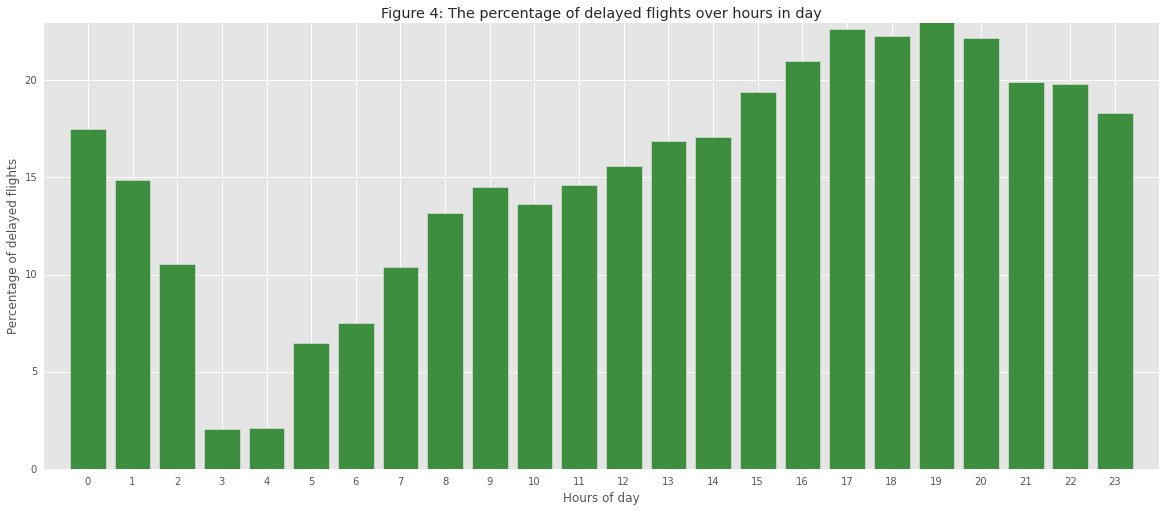

In [30]:
# plot a bar chart
plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', color = '#3E8E40')
plt.xticks(pdf_delay_ratio_per_hour[0])
plt.ylabel('Percentage of delayed flights')
plt.xlabel('Hours of day')
plt.title('Figure 4: The percentage of delayed flights over hours in day')
plt.margins(0.025, 0)
plt.show()

<div class="alert alert-warning">
There is a huge difference in the fraction of delayed flights, between *7pm* and *8pm* almost 1 flight out of 4 is delayed, while the lowest probabilities are between *3am* and *5am*. Anyway, this values just represent the probability of a flight to be delayed, without caring about how big is the delay. Later on, in this notebook, we are going to analyze also that aspect.
<br/>
Even though regarding the total number of flights the difference between the weekdays was not huge, we decided to consider the delay for each day of the week as well, to see if there is any difference or pattern to be observed.
</div>
<div class="alert alert-info">
QUESTION: does this plot change depending on the day of the week? 
</div>

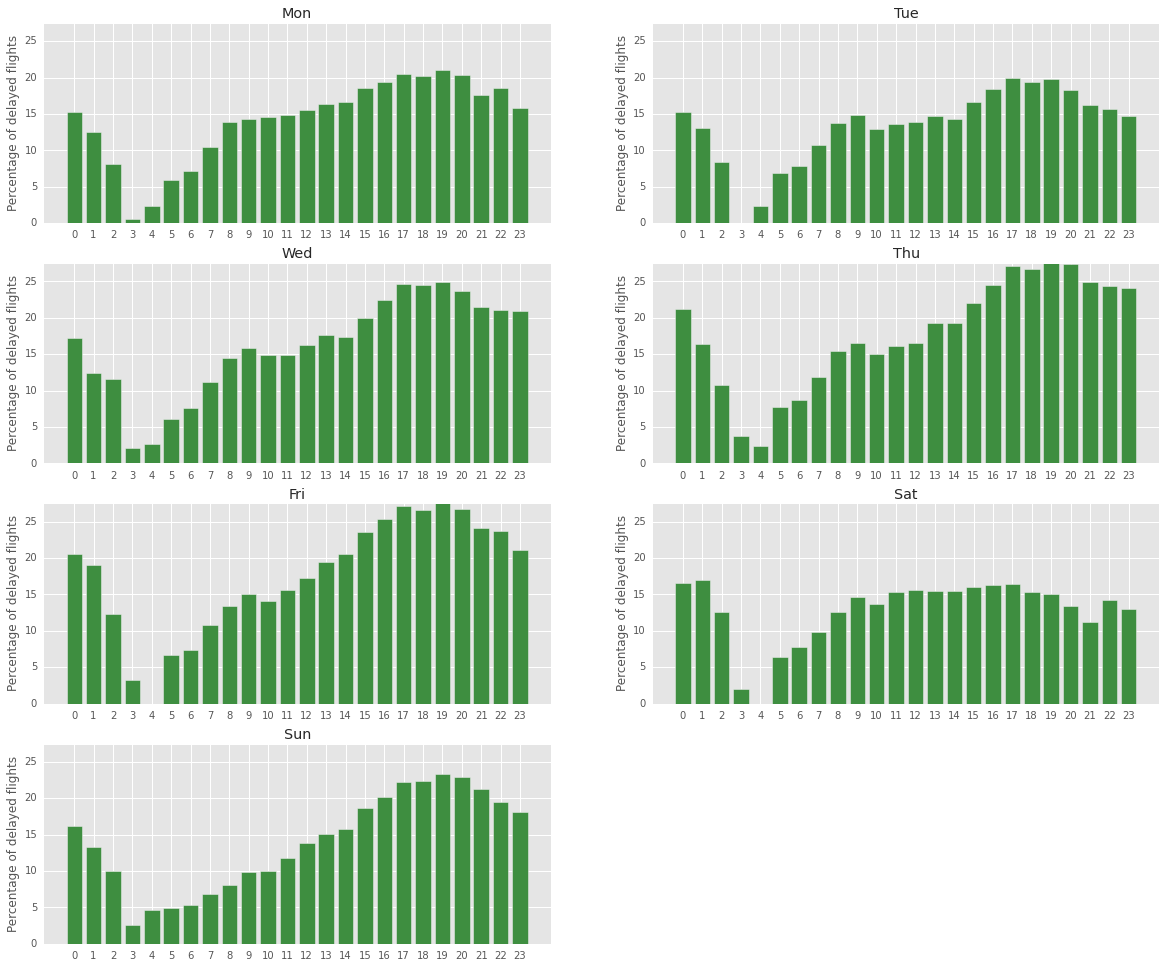

In [31]:
fig = plt.figure(figsize=(20.0, 16.5))

for i in range(1, 8):
    df_with_delay_per_dow = df.filter(col('day_of_week') == i)\
            .withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
    delay_per_hour_per_dow = df_with_delay_per_dow.withColumn('hour', round(df.scheduled_departure_time/100, 0) % 24)
    statistic_delay_hour_per_dow = delay_per_hour_per_dow.groupBy(['hour', 'year'])
    delay_ratio_per_hour_per_dow = statistic_delay_hour_per_dow.agg(
        (100*sum('is_delay') / count('*')).alias('delay_ratio')
    )
    delay_ratio_per_hour_per_dow = delay_ratio_per_hour_per_dow.orderBy('delay_ratio').select(['hour', 'delay_ratio'])
    pdf = pd.DataFrame(data = delay_ratio_per_hour_per_dow.collect())
    
    plt.subplot(4,2,i)
    plt.ylim(0, 27.5)
    plt.bar(pdf[0], pdf[1], align='center', color = '#3E8E40')
    plt.ylabel('Percentage of delayed flights')
    plt.xticks(pdf[0])
    plt.title(weekdays[i-1])
    plt.margins(0.05, 0)

plt.show()

<div class="alert alert-warning">
We can see that the behaviour is similar considering different days of the week, anyway there is some difference we should highlight. For instance on Saturday the percentage of delayed flights is smaller that on the other days (as we had already seen) and the night hours don't follow the same "schema" as it's the case on the other days: we can see, indeed, that the most delayed hour is 1a.m. instead of 7p.m. as it happens on the other days.
</div>

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

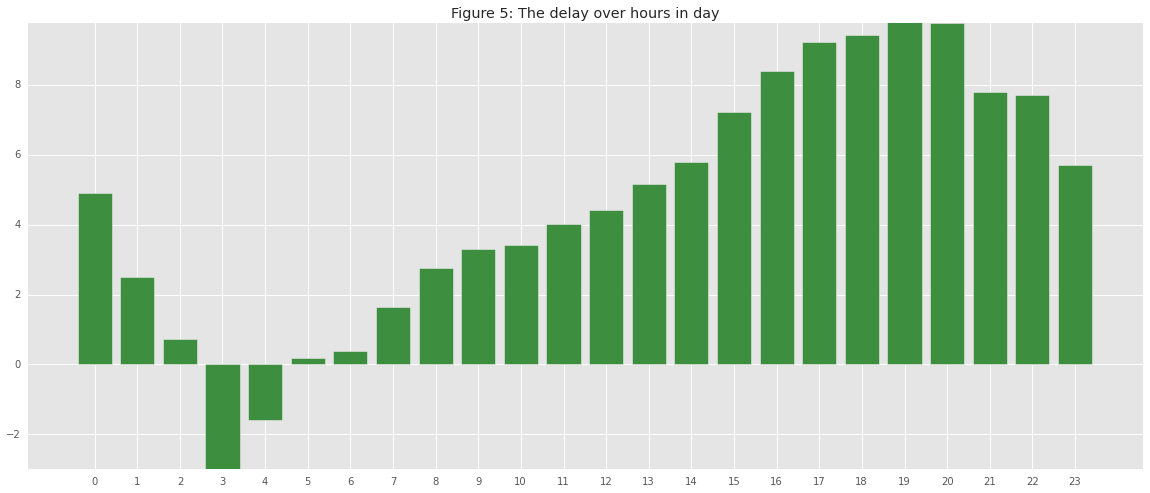

In [32]:
mean_delay_per_hour = statistic_delay_hour\
        .agg(mean('arrival_delay').alias('mean_delay'))\
        .orderBy('mean_delay')\
        .select(['hour','mean_delay'])
    
pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.bar(pdf_mean_delay_per_hour[0], pdf_mean_delay_per_hour[1], align='center', color = '#3E8E40')
plt.xticks(pdf_mean_delay_per_hour[0])
plt.title('Figure 5: The delay over hours in day')
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning"> 
We can see that at 3a.m and 4a.m. it is slightly common to arrive earlier than expected, while the hours between 7p.m. and 8.p.m. are the ones where the average delay is higher. We should consider though that this plot performs the average over all the flights (both delayed and early flights).
</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

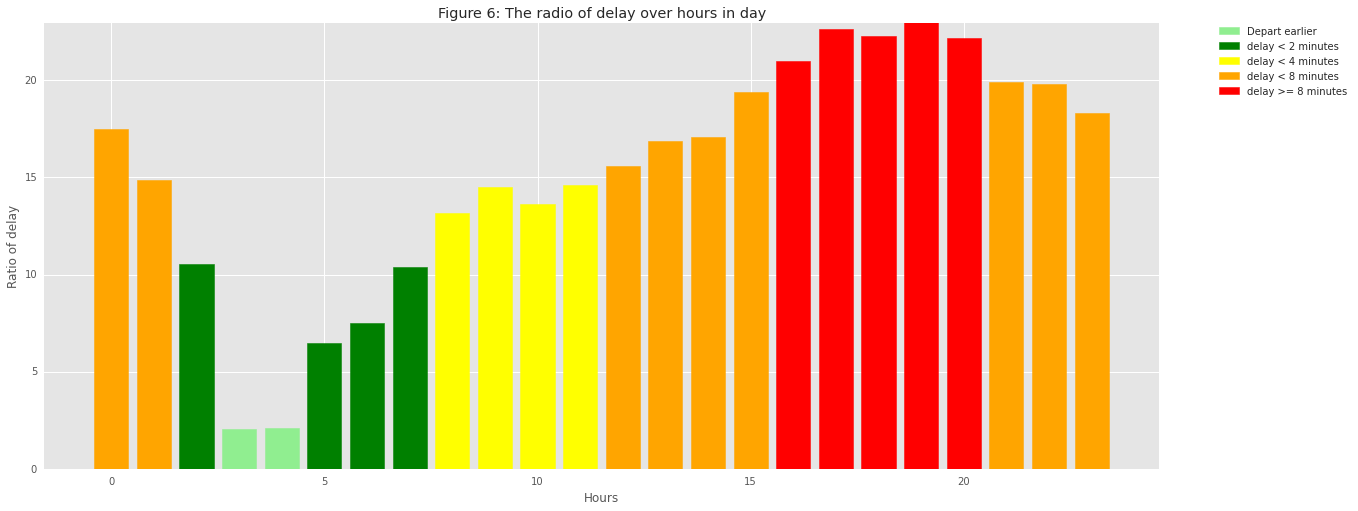

In [33]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.margins(0.05, 0)
plt.show()

In the new figure (Figure 6), we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart earlier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.


#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

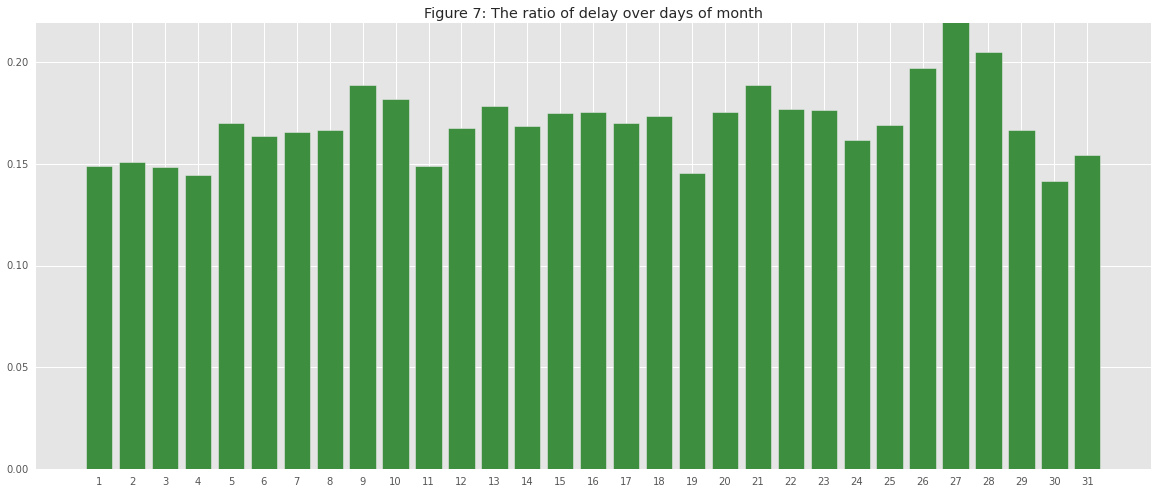

In [34]:
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
        .orderBy('day_of_month')
    )
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(data=statistic_day_of_month.collect())
plt.bar(pdf_day_of_month[0], pdf_day_of_month[1], align='center', color = '#3E8E40')
plt.xticks(pdf_day_of_month[0])
plt.title('Figure 7: The ratio of delay over days of month')
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning"> This Figure shows that, on average, the flights have a bigger chance to be delayed on the 27th of each month, while the day with the lowest delay-ratio is the 30th. However, we thought that this plot doesn't give a good insight of our data, since there is no correlation between the day itself and the day of the week and therefore this aspect is not taken into account, in the same way this plot does not take into account particular events such as holidays or similar (and we have already seen that these events could have a big impact on the flights). Thus, we decided to plot the ratio of delays per over days of month for each month separately, in order to try to spot any aspect of interest. </div>
<div class="alert alert-info">
QUESTION: plot the ratio of delays over days of month for each month.
</div>

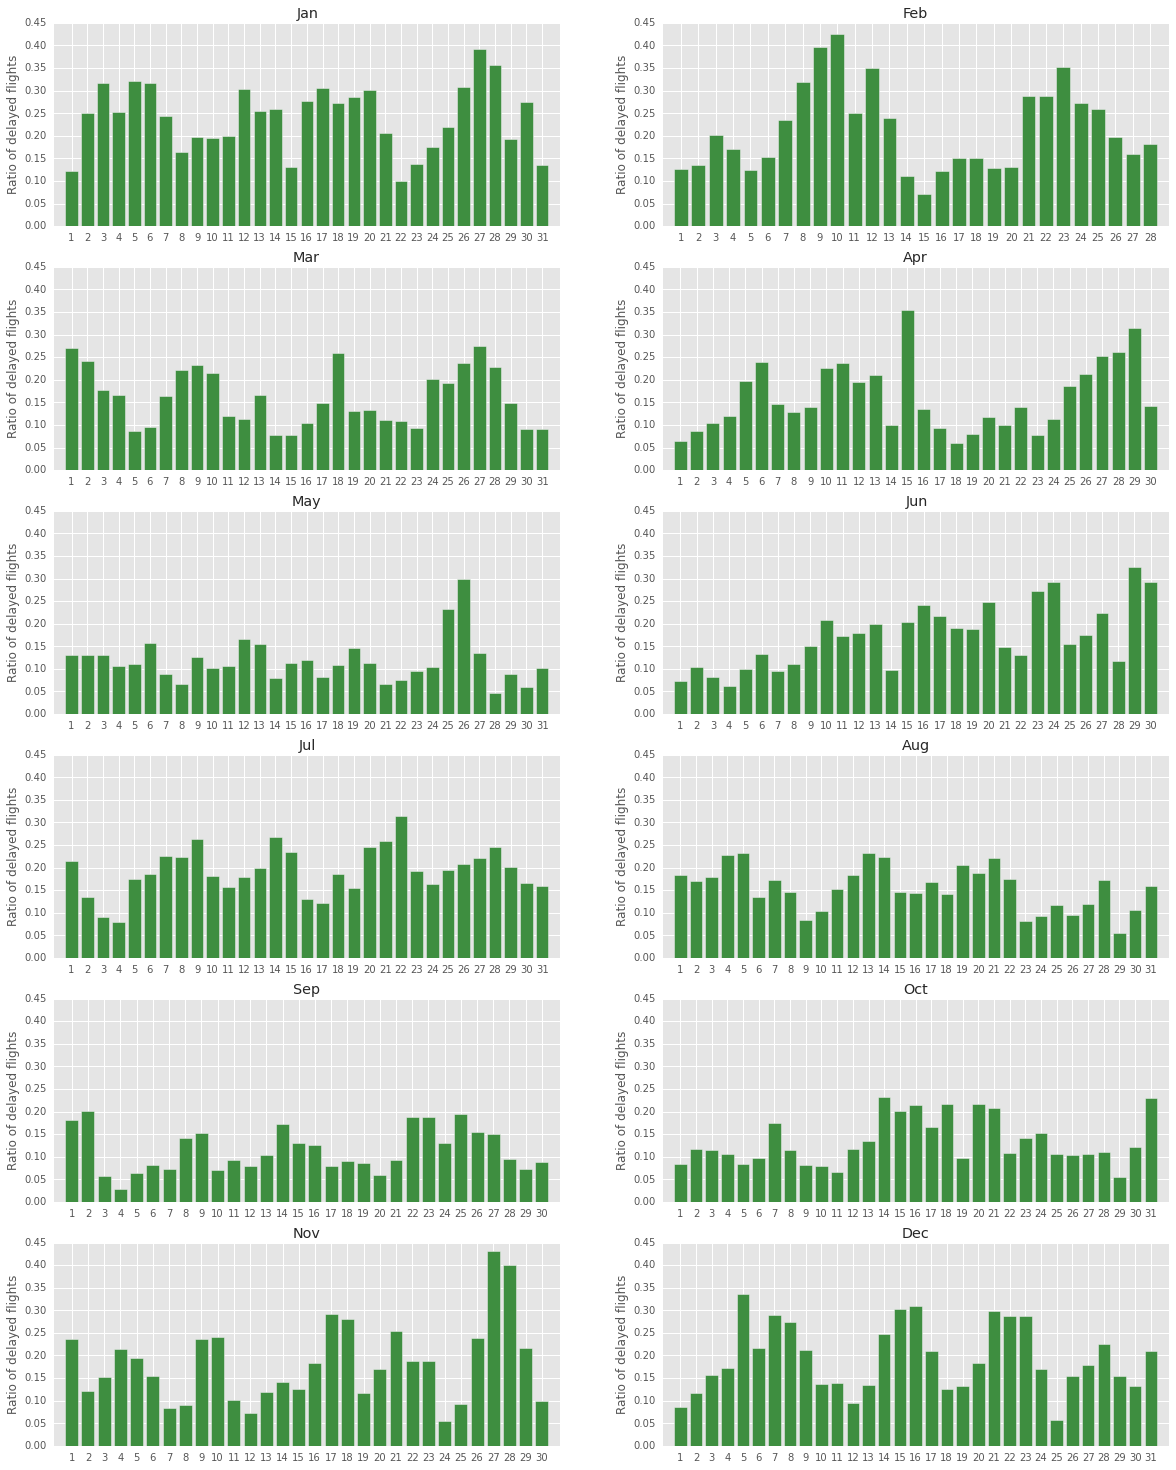

In [35]:
fig = plt.figure(figsize=(20.0, 25.5))

for i in range(1,13):
    statistic_day_of_month = (
        df_with_delay.filter(col('month') == i).groupBy('day_of_month')
            .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
            .orderBy('day_of_month')
        )

    # collect data and plot
    pdf = pd.DataFrame(data=statistic_day_of_month.collect())
    plt.subplot(6,2,i)
    plt.ylim(0, 0.45)
    plt.bar(pdf[0], pdf[1], align='center', color = '#3E8E40')
    plt.xticks(pdf[0])
    plt.ylabel('Ratio of delayed flights')
    plt.title(months[i-1])
    plt.margins(0.025, 0)

plt.show()

<div class="alert alert-warning">
From this graph we can get some additional information. For instance, we can see that the correlation between the day of the week and the ratio of delayed flights is not as easy to spot as it was for the number of flights (we will focus on the days of the week later). It is interesting to notice that there is a very low ratio of delayed flights in correspondece with *Christmas*, *Black Friday* (*November, 25*) and *Thanksgiving day* (*November, 24*), and this is probably related to the lower number of flights in those days: the airports are less busy and it's easier for them not to have delayed flights.
There is also some interesting peak throughout the year but they apparently don't follow any kind of logical behaviour, we will probably be able to better interpret these data after the following couple of questions, when we are going to analyze delays relating to days of week and month. 
</div>

#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

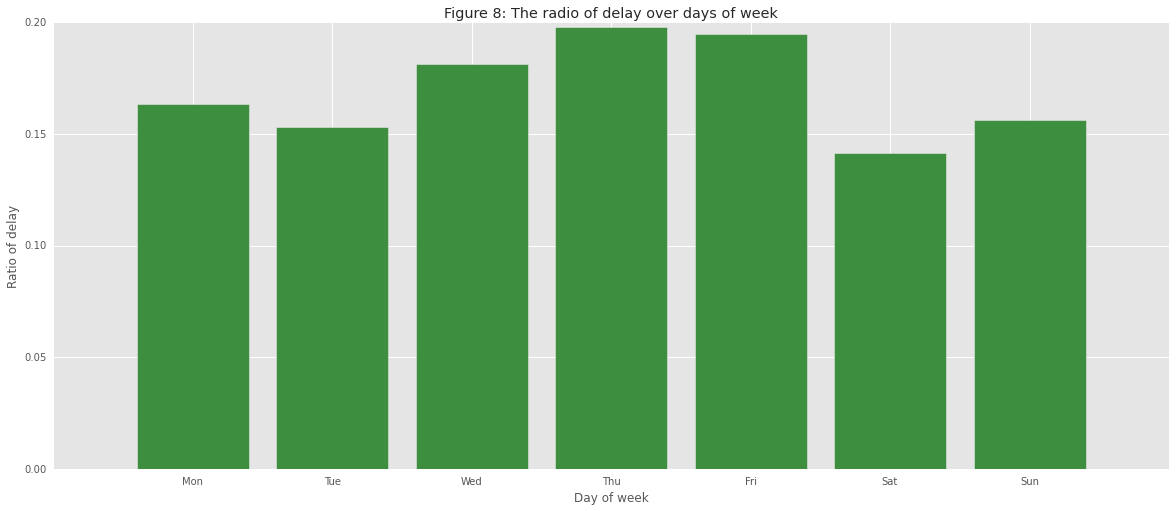

In [36]:
####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay
        .groupBy('day_of_week')
        .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
        .orderBy('day_of_week')
    )
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(data=statistic_day_of_week.collect())
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.bar(pdf_day_of_week[0], pdf_day_of_week[1], align='center', color = '#3E8E40')
plt.ylabel('Ratio of delay')
plt.xlabel('Day of week')
plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()

<div class="alert alert-warning">

As we have shown before in another plot, the distribution of flights throughout the week is almost uniform, the only exceptions are in the weekend when we can observe a lower number of flights.
This is probably the reason why during Saturday and Sunday there is a lower chance of being delayed, since it's easier for the airports to manage all the flights.
On the other hand, it is very interesting to notice the quite huge difference between the other days, especially the peak of Thursday, that cannot be related only to the number of flights. There should be some other reason, and this cannot even be the distribution of flights throughout the day, since we have shown that - also from this point of view - the differences between Thursday and the other days of the week are very small.

</div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

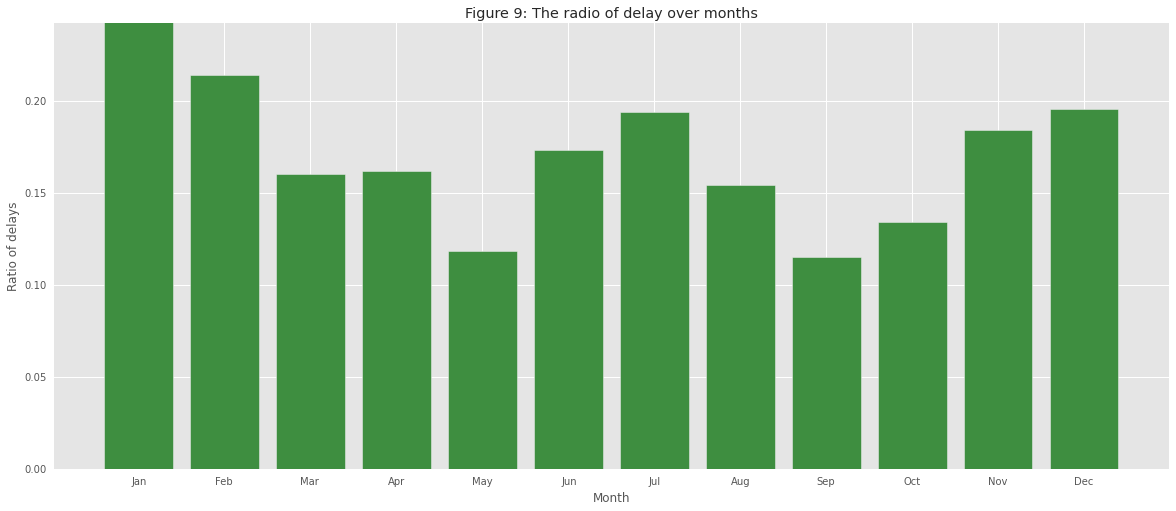

In [37]:
####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay
        .groupBy('month')
        .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
        .orderBy('month')
    )
    
# collect data and plot
pdf_month = pd.DataFrame(data=statistic_month.collect())

map_int_into_month = { 1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", \
                       10:"Oct", 11:"Nov", 12:"Dec"}
month_label = pdf_month[0].map(lambda i: map_int_into_month[i])

plt.bar(pdf_month[0], pdf_month[1], align='center', color = '#3E8E40')
plt.xticks(pdf_month[0], month_label)
plt.ylabel('Ratio of delays')
plt.xlabel('Month')
plt.title('Figure 9: The radio of delay over months')
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning">
As we can see, flights are more likely to be delayed in January, February, July and December. The reasons for these delays could be different: regarding July, the quite high percentge of delayed flights is probably due to the increased number of fligths we have noticed in the previous plot. Anyway, August was even busier while the percentage of delayed flights is way lower than in July, thus there should also be some other reason.

Regarding the other three months we are talking about, probably the delays are mainly due to adverse weather conditions: we are observing US data and during the winter period there is a huge chance, in the northern part of the US, of having problems in the standard flight traffic due to snow storms and ice. Later on in this notebook we are going to analyze weather data as well and maybe we'll be able to figure out something more.
</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [38]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

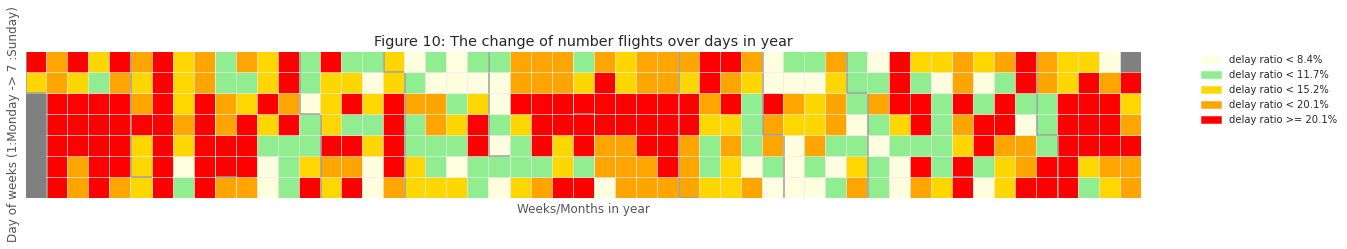

In [39]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: The change of number flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<div class="alert alert-warning">
This plot recaps somehow what we have already analyzed in the previous plot (flights on Saturday and Sunday are less likely to be delayed) but it also gives some additional information. We can see from the predominance of the red and orange color that, when there is a delay, is likely to have many delays.
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [40]:
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['src_airport'])
        .join(airports_df, col('src_airport') == col('code'))
        .select('src_airport', 'delay_ratio', 'name', 'city')
    )
statistic_ratio_delay_airport.show(20, False)

+-----------+-------------------+----------------------------------------------------------+-----------------+
|src_airport|delay_ratio        |name                                                      |city             |
+-----------+-------------------+----------------------------------------------------------+-----------------+
|ATL        |0.21205403501801467|Hartsfield Jackson Atlanta International Airport          |Atlanta          |
|BOS        |0.20337767149902855|General Edward Lawrence Logan International Airport       |Boston           |
|CLT        |0.22251161209048542|Charlotte Douglas International Airport                   |Charlotte        |
|DCA        |0.1599864322460286 |Ronald Reagan Washington National Airport                 |Washington       |
|DEN        |0.20354670607451195|Denver International Airport                              |Denver           |
|DFW        |0.22524719636014578|Dallas Fort Worth International Airport                   |Dallas-Fort Worth|
|

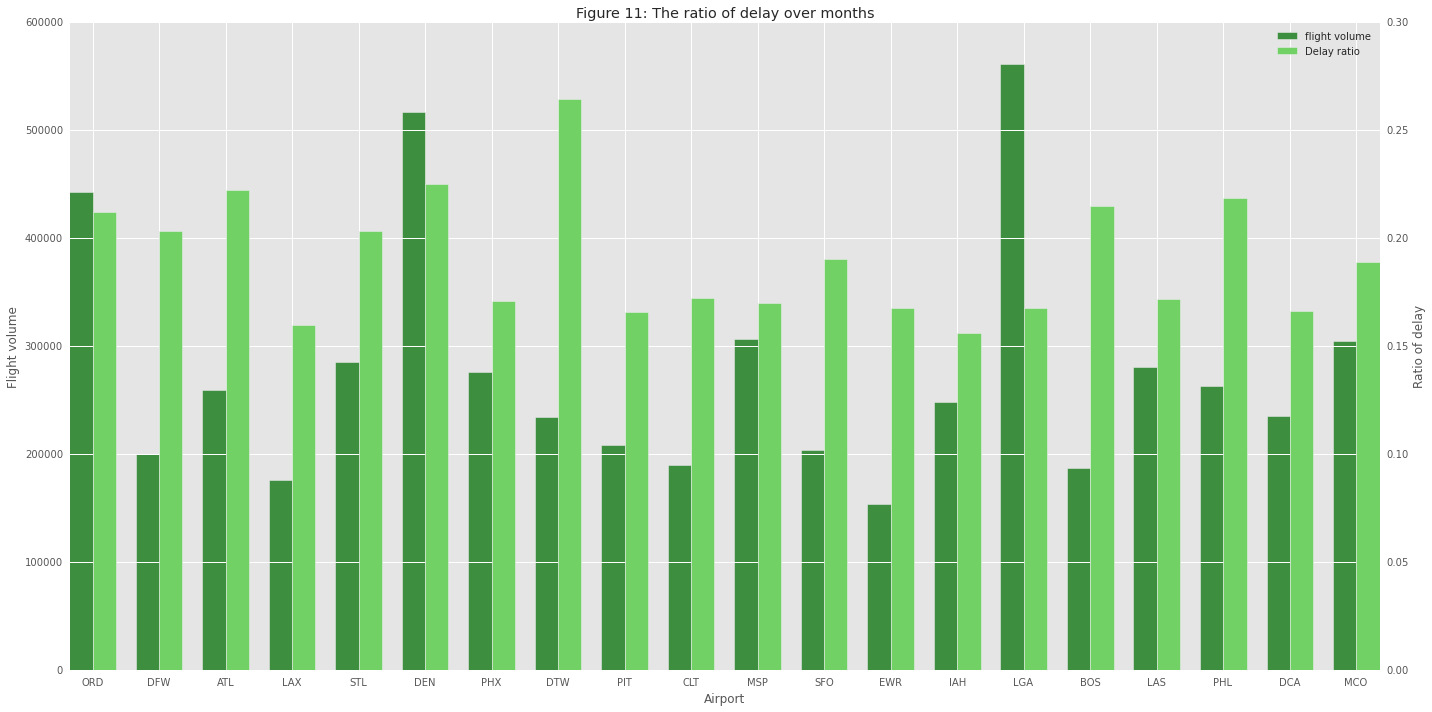

In [48]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.select('src_airport','total')\
                                            .take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='src_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='#3E8E40', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='#71d164', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
Looking at this plot we can see that the delay ratio is not directly related to the number of flights. Indeed there are airports with a very high flight volume and a relatively low delay ratio (e.g. LGA) and on the other hand there are airports with a small flight volume and a high delay ratio (e.g. DTW). It is interesting to analyze this aspect, since it could also be, while taking into account other aspects as well (mainly weather conditions) as a measure of the "efficiency" of each airport.
</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

In [49]:
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(df_with_delay.carrier.isin(top_20_carriers))
        # group by carriers
        .groupBy('carrier')
        #  calculate the delay ratio
        .agg((sum('is_delay') / count('*')).alias('delay_ratio'))
        # sort by name of carrier
        .orderBy(['carrier'])
    )
statistic_ratio_delay_carrier.show(20)

+-------+-------------------+
|carrier|        delay_ratio|
+-------+-------------------+
|     AA| 0.1752444006939166|
|     AS| 0.1596424771227921|
|     CO| 0.1955576547849367|
|     DL|0.18328443065157582|
|     HP|0.18625141269939444|
|     NW| 0.1294806523639286|
|     TW|0.18212273193780135|
|     UA| 0.1686528375733855|
|     US|0.18422298014001534|
|     WN|0.12829795587751536|
+-------+-------------------+



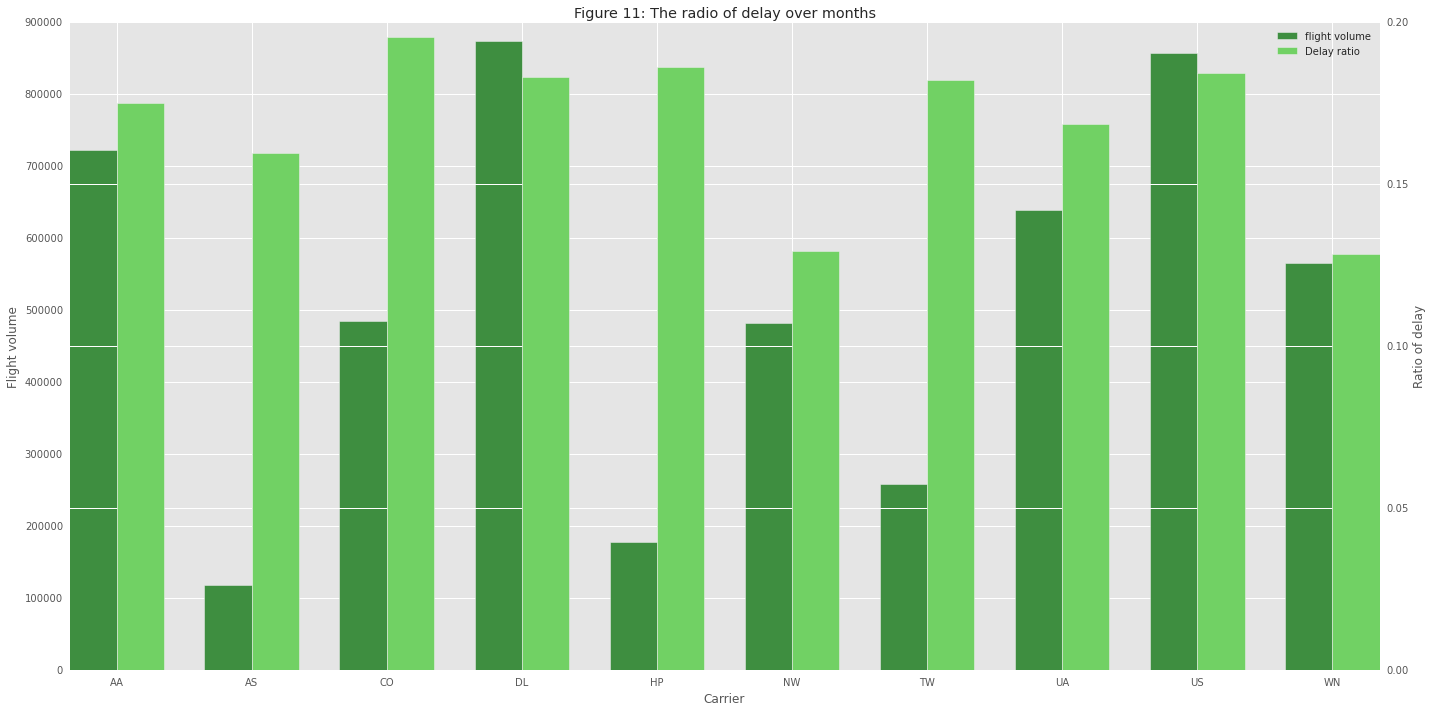

In [50]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
#print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='#3E8E40', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='#71d164', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
The behaviour is similar to the one observed for the airports, even though in this case there is no carrier with a very high flight volume and a low delay ratio. On the other hand we can spot several carriers that have a high delay ratio while having a small flight volume (e.g. AS, HP, TW). Thus, we can say that the amount of flights performed by each carrier (and it's the same for the airports) doesn't give on its own any information about the percentage of flights that are delayed.
</div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [51]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common airport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [52]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
map_dest_airports_to_index = dict(zip(dest_airports, range(num_dest_airports)))

# test the dictionary
print(map_dest_airports_to_index['ORD'])
print(map_dest_airports_to_index['ATL'])

0
2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [53]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common carrier will be on the top
stat_carrier = (
    df
        .groupBy('carrier')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(len(carriers))))

print(map_carriers_to_index)

{'US': 1, 'NW': 6, 'CO': 5, 'AS': 9, 'DL': 0, 'HP': 8, 'AA': 2, 'TW': 7, 'UA': 3, 'WN': 4}


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [54]:
the_most_common_month = (
    df
        .groupBy('month')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [55]:
the_most_common_day_of_month = (
    df
        .groupBy('day_of_month')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
        .groupBy('day_of_week')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [56]:
the_most_common_s_departure_time = (
    df
        .groupBy('scheduled_departure_time')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df
        .groupBy('scheduled_arrival_time')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]


print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [57]:
# calculate mean distance
mean_distance = df.select(mean('distance')).first()[0]
print("mean distance:", mean_distance)

mean distance: 670.7402911985982


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [58]:
# calculate mean arrival delay
mean_arrival_delay = df.select(mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [59]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return len(value) > 0

In [60]:
data = cleaned_data\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]], # src_airport
                map_dest_airports_to_index[values[17]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7, 0.3))

trainingData = trainingData.cache()
testData = testData.cache()

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [61]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8:  num_dest_airports, 10: 2}

In [63]:
# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [64]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = %.4f' % testMSE)

Test Mean Squared Error = 492.0618


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div class="alert alert-warning">
No, the result is not very good. There could be many causes to this poor performance: usage of too few data or features (or focusing on the rwong ones), overfitting or on the other hand a tree too small that cannot perform a decent prediction. In the following part of the notebook we are going to work on these aspects in order to try to see which one is the main cause of this result.
</div>

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [62]:
from pyspark.mllib.tree import RandomForest, RandomForestModel

In [57]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 483.4601156366064


<div class="alert alert-warning">
In this case the performances are a bit better but, still, we are not obtaining good results.
</div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!

</div>

In [19]:
numTrees = range(10,20,4)
maxDepths = range(10,19,4)
maxBins = [225]

testMSE = []

for k in numTrees:
    for i in maxDepths:
        for j in maxBins:
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=k, impurity='variance', maxDepth=i, maxBins=j)

            predictions = forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
            tmpTestMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
            
            testMSE.append(tmpTestMSE)

            print('numTrees=%2d, maxDepth=%2d, maxBins=%d: TestMSE = %.4f' %(k, i, j, tmpTestMSE))

numTrees=10, maxDepth=10, maxBins=225: TestMSE = 495.2364
numTrees=10, maxDepth=14, maxBins=225: TestMSE = 458.1747
numTrees=10, maxDepth=18, maxBins=225: TestMSE = 432.3187
numTrees=14, maxDepth=10, maxBins=225: TestMSE = 495.6147
numTrees=14, maxDepth=14, maxBins=225: TestMSE = 460.5565
numTrees=14, maxDepth=18, maxBins=225: TestMSE = 423.3471
numTrees=18, maxDepth=10, maxBins=225: TestMSE = 495.6997
numTrees=18, maxDepth=14, maxBins=225: TestMSE = 457.3875
numTrees=18, maxDepth=18, maxBins=225: TestMSE = 424.7709


<div class="alert alert-warning">
In this section we focused on focused on parameters:
<ul>*Number of trees*: increasing the number of trees, without changing the other parameters, the result changes but this difference is very small. This change could be both an improvement or a decrease of performances and this is kind of strange since a forest with more trees should theoretically perform better, we guess that this behaviour could be due to statistical variance. </ul>
<ul>*max depth*: in this case, increasing the value of the parameter we obtain better results. Anyway we cannot just choose a very high for it and hope to have a perfect predictor since we would get overfitting of our data and it would be very slow as well.</ul>
</div>

<div class="alert alert-info">
QUESTION: another aspect that could have a huge influence on the performance is the split ratio between training set and test set. Now that we have the "optimal" parameters let's try different splits to improve the prediction.
</div>
Important: we decided not to use the "optimal" parameters for time reasons: we did not have enough time and we thought that the behaviour depending on the split size wouldn't change much between different parameters.

In [67]:
xVal = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
testMSE = []

for i in xVal:

    (trainingDataVar, testDataVar) = data.randomSplit((i, 1-i))

    trainingDataVar = trainingDataVar.cache()
    testDataVar = testDataVar.cache()

    model = DecisionTree.trainRegressor(trainingDataVar, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)
    
    predictions = model.predict(testDataVar.map(lambda x: x.features))
    labelsAndPredictions = testDataVar.map(lambda lp: lp.label).zip(predictions)
    tmpTestMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
    
    testMSE.append(tmpTestMSE)
    
    print('Split: %f:%f - Test Mean Squared Error = %.4f' %(i, 1-i, tmpTestMSE))

Split: 0.400000:0.600000 - Test Mean Squared Error = 500.5946
Split: 0.500000:0.500000 - Test Mean Squared Error = 497.8742
Split: 0.600000:0.400000 - Test Mean Squared Error = 494.8057
Split: 0.700000:0.300000 - Test Mean Squared Error = 490.4616
Split: 0.800000:0.200000 - Test Mean Squared Error = 497.4057
Split: 0.900000:0.100000 - Test Mean Squared Error = 492.9769
Split: 0.950000:0.050000 - Test Mean Squared Error = 498.8898


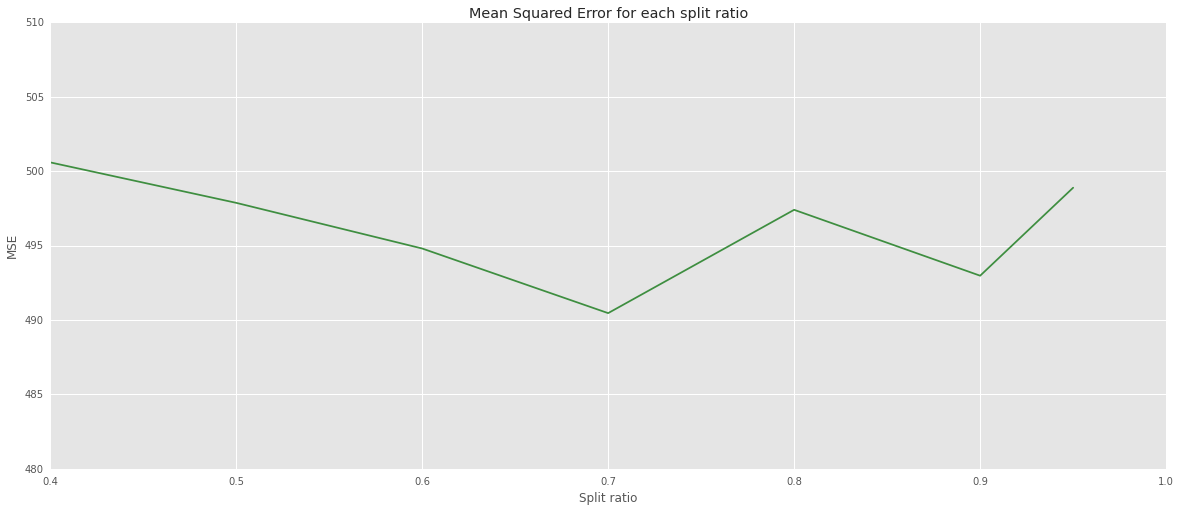

In [73]:
plt.ylim(480, 510)
plt.plot(xVal, testMSE, color='#3E8E40')
plt.xlabel('Split ratio')
plt.ylabel('MSE')
plt.grid(True, which='both', ls='-')
plt.title('Mean Squared Error for each split ratio')
plt.show()

<div class="alert alert-warning">
As we can see, the result doesn't change much depending on the split ratio. Considering these splits, the best result was  490.4616 and the worst one 500.5946. The behaviour is easily understandable between 0.4 and 0.7, since the performances improve accordingly to the dimension of the training set (having a small training set cannot lead to good results). For bigger training sets, the performance decreases and there is a peak in 0.8:0.2, probably due to a test set too small, that is not capable anymore of a reliable evaluation.
</div>

# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

In [74]:
#Load data
raw_data = sc.textFile("/datasets/airline/{199[4-9],200[0-4]}.csv")

# extract the header
header = raw_data.take(1)[0]

# replace invalid data with NULL and remove headers
cleaned_data = (raw_data\
        .filter(lambda x: x != header)
        .map(process_row)
        )

<div class="alert alert-warning">
Now we have a way bigger dataset, and before doing anything with it we should perform some data analysis to see if there are differences in this bigger set of data. Afterwards we can perform the prediction and compare the results with the ones already obtained.
<br/>
We decided to use only 10 years in order not to have too many data (and a very slow computation) and because the data about some of the features we are focusing on (airplanes information and weather information) had some problem in the other years.
</div>

In [75]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0]  else None,
            int(cols[1])  if cols[1]  else None,
            int(cols[2])  if cols[2]  else None,
            int(cols[3])  if cols[3]  else None,
            int(cols[4])  if cols[4]  else None,
            int(cols[5])  if cols[5]  else None,
            int(cols[6])  if cols[6]  else None,
            int(cols[7])  if cols[7]  else None,
            cols[8]       if cols[8]  else None,
            cols[9]       if cols[9]  else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

In [76]:
# create dataframe df
df = sqlContext\
        .createDataFrame(cleaned_data_to_columns, airline_data_schema)\
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay', 'distance', 'carrier', 'src_airport', 'dest_airport', 'tail_number')\
        .cache()
df.show(10)

+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+------------+-----------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|carrier|src_airport|dest_airport|tail_number|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+------------+-----------+
|1994|    1|           7|          5|                     900|                  1003|           -9|     290|     US|        CLT|         ORF|       null|
|1994|    1|           8|          6|                     900|                  1003|          -11|     290|     US|        CLT|         ORF|       null|
|1994|    1|          10|          1|                     900|                  1003|           20|     290|     US|        CLT|         ORF|       null|
|1994|    1|          11|          2|                     900|              

<div class="alert alert-info">
QUESTION: First of all, we want to perform again part of the alanysis done before, to see if there are huge changes in the features of the dataset (for instance is the clear difference between working days and weekends stil valid?).
</div>
<div class="alert alert-warning">
IMPORTANT: while performing some analysis (number of airports and of carriers) we decided to already perform the mapping to unique indeces that we are going to need in the predictor.
</div>

In [77]:
stat_src = (df.groupBy('src_airport').agg(count('*').alias('count')).orderBy(desc('count')))

src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
print('Number of source airports: %d' %(num_src_airports))

map_src_airport_to_index = dict(zip(src_airports, range(0, num_src_airports)))

Number of source airports: 301


In [78]:
stat_dest = (df.groupBy('dest_airport').agg(count('*').alias('count')).orderBy(desc('count')))

dest_airports = [item[0] for item in stat_dest.collect()]

num_dest_airports = len(dest_airports)
print('Number of destination airports: %d' %(num_dest_airports))

map_dest_airports_to_index = dict(zip(dest_airports, range(num_dest_airports)))

Number of destination airports: 304


<div class="alert alert-warning">
Reasonably, we have a bigger number of airports, since we are considering a way bigger amount of data, and we can still observe the same behaviour as before: there are airports present only as destination (as source as well?) of the flights. Let's find them.
</div>

In [79]:
#Print the destination-only airports
list_src_airports = [ x[:][0] for x in df.select('src_airport').drop_duplicates().collect() ]
list_dest_airports = [ x[:][0] for x in df.select('dest_airport').drop_duplicates().collect() ]
only_dest_airport = [ x for x in list_dest_airports if x not in list_src_airports ]
airports_df[airports_df.code.isin(only_dest_airport)].select('name', 'country').show(truncate=False)

+----------------------------------------------+-------------+
|name                                          |country      |
+----------------------------------------------+-------------+
|Antonio B. Won Pat International Airport      |Guam         |
|Fairchild Air Force Base                      |United States|
|Boeing Field King County International Airport|United States|
|Columbus Air Force Base                       |United States|
+----------------------------------------------+-------------+



In [80]:
#print the source-only airports
only_src_airport = [ x for x in list_src_airports if x not in list_dest_airports ]
airports_df[airports_df.code.isin(only_src_airport)].select('name', 'country').show(truncate=False)

+----------------------------+------------------------+
|name                        |country                 |
+----------------------------+------------------------+
|Saipan International Airport|Northern Mariana Islands|
+----------------------------+------------------------+



<div class="alert alert-info">
QUESTION: How many carriers in this new dataset?
</div>

In [84]:
stat_carrier = (df.groupBy('carrier').agg(count('*').alias('count')).orderBy(desc('count')))

carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
print('There are %d carriers.' %(num_carriers))

carriers_df[carriers_df.Code.isin(carriers)].show(truncate=False)

map_carriers_to_index = dict(zip(carriers, range(len(carriers))))
print("Mapping carrier : unique identifier")
print(map_carriers_to_index)

There are 21 carriers.
+----+-----------------------------------------------------------------------------------+
|Code|Description                                                                        |
+----+-----------------------------------------------------------------------------------+
|AA  |American Airlines Inc.                                                             |
|AQ  |Aloha Airlines Inc.                                                                |
|AS  |Alaska Airlines Inc.                                                               |
|B6  |JetBlue Airways                                                                    |
|CO  |Continental Air Lines Inc.                                                         |
|DH  |Independence Air                                                                   |
|DL  |Delta Air Lines Inc.                                                               |
|EV  |Atlantic Southeast Airlines                                  

<div class="alert alert-warning">
As it was the case for the number of airports, also the number of carriers is increased, by 110%!
We decided to already perform the mapping to unique values, since we are going to need it for the predictor.
</div>

<div class="alert alert-info">
QUESTION: Analyze the amount of flights for each day of the week.
</div>

+-----------+-------+
|day_of_week|  count|
+-----------+-------+
|          1|9194466|
|          2|9182210|
|          3|9189515|
|          4|9173467|
|          5|9177058|
|          6|8098522|
|          7|8708672|
+-----------+-------+



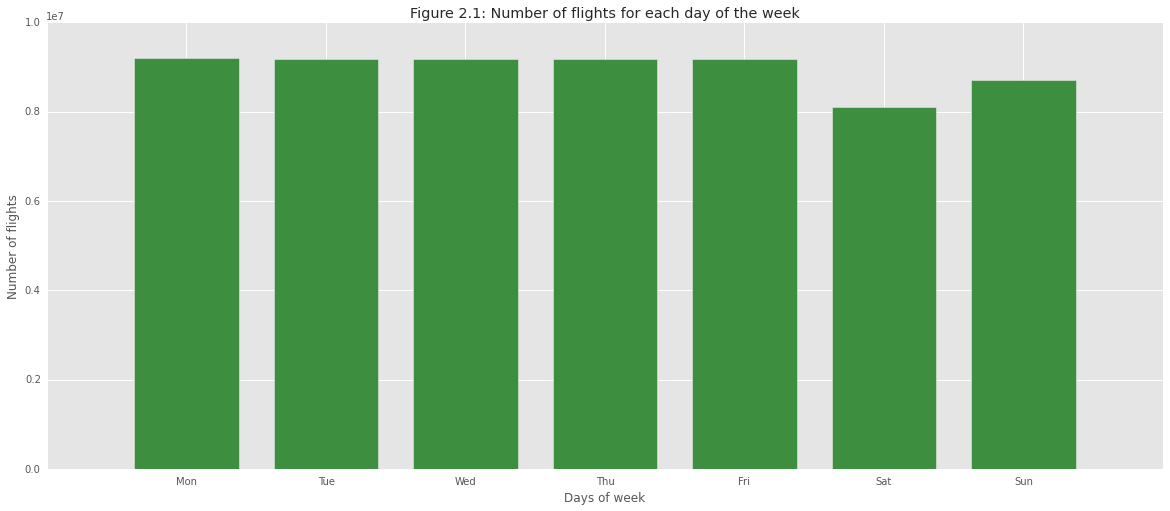

In [85]:
statistic_day_of_week = df.groupBy('day_of_week').count().orderBy('day_of_week')
statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_day_of_week.collect())
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2.1: Number of flights for each day of the week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])

plt.bar(pdf[0], pdf[1], align='center', width=0.75, color='#3E8E40')

plt.xticks(pdf[0], day_of_week_label)
plt.show()

<div class="alert alert-warning">
The behaviour is similar to the one of 1994, with week-days much busier than weekends, anyway there is a difference between Saturday and Sunday, difference that was not so big in the previous situation.
</div>
<div class="alert alert-info">
QUESTION: Analyze the amount of flights for each month.
</div>

+-----+-------+
|month|  count|
+-----+-------+
|    1|5273805|
|    2|4847586|
|    3|5356257|
|    4|5164498|
|    5|5289538|
|    6|5231806|
|    7|5415304|
|    8|5465442|
|    9|5144200|
|   10|5288012|
|   11|5027051|
|   12|5220411|
+-----+-------+



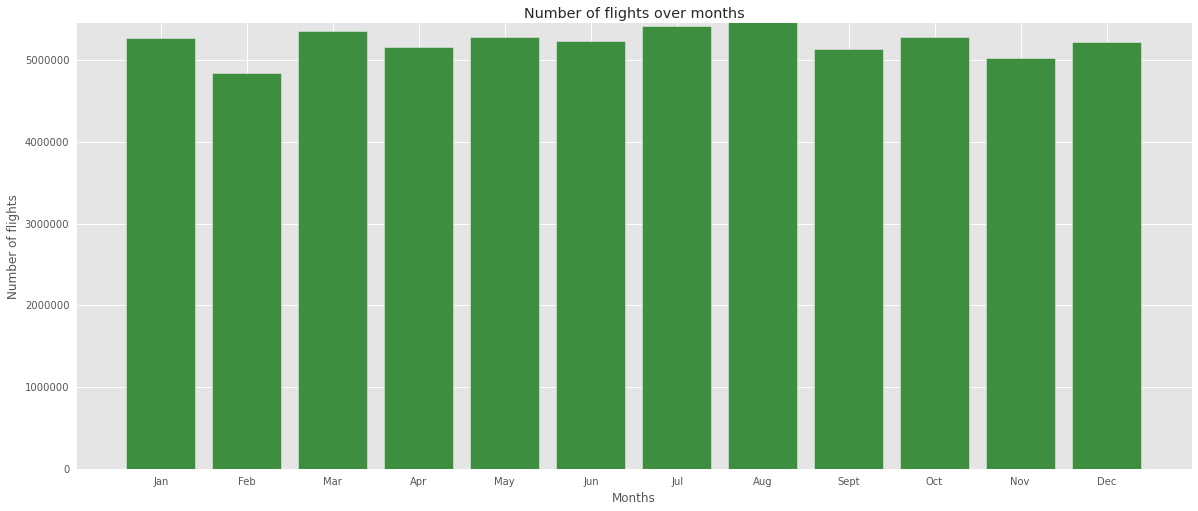

In [86]:
statistic_month = df.groupBy('month').count().orderBy('month')
statistic_month.show()

pdf = pd.DataFrame(data=statistic_month.collect())
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Number of flights over months')
plt.grid(True, which="both", ls="-")
plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
plt.xticks(pdf[0], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning">
Regarding the months, the situation is almost the same as it was taking into account only 1994, there is only a minor difference for September, that is a bit less busy than it was before.
</div>
<div class="alert alert-info">
QUESTION: Analyze the amount of flights for each hour of day.
</div>

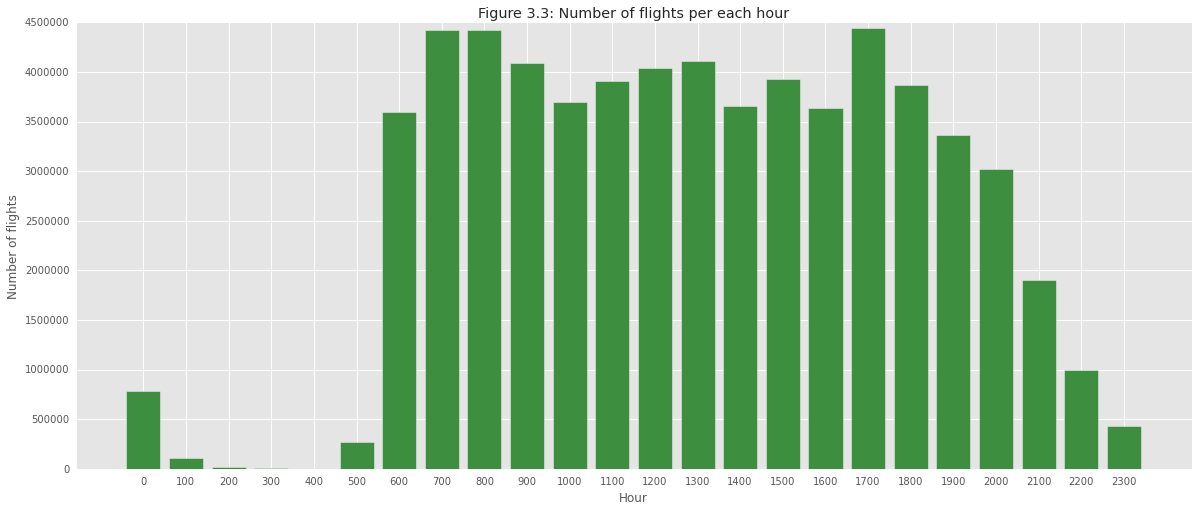

In [89]:
statistic_hour_of_day = df.withColumn('hour_of_day', 
                                      (df.scheduled_departure_time - df.scheduled_departure_time % 100) % 2400)\
                            .groupBy('hour_of_day').count().orderBy('hour_of_day')
#statistic_hour_of_day.show(24)

pdf = pd.DataFrame(data=statistic_hour_of_day.collect())
# plot bar chart
plt.title('Figure 3.3: Number of flights per each hour')
plt.ylabel('Number of flights')
plt.xlabel('Hour')
plt.ylim(0, 4500000)
plt.bar(pdf[0], pdf[1], align='center', width=80, color='#3E8E40')
plt.xticks(pdf[0])
plt.margins(0.05, 0)
plt.show()

<div class="alert alert-warning">
Also in this case, the result is very similar to the one obtained for 1994, it is almost impossible to spot any difference.
</div>
<div class="alert alert-info">
We have seen that the difference in the features of the dataset are only minor differences, now we analyze the change of data throughout the years, before moving to the prediction.
<br/>
QUESTION: How does the number of flights change throughout the years?
</div>

In [90]:
# number of inbound outbound flights per month per year
inbound_per_month = df.groupBy('month', 'year').count().cache()

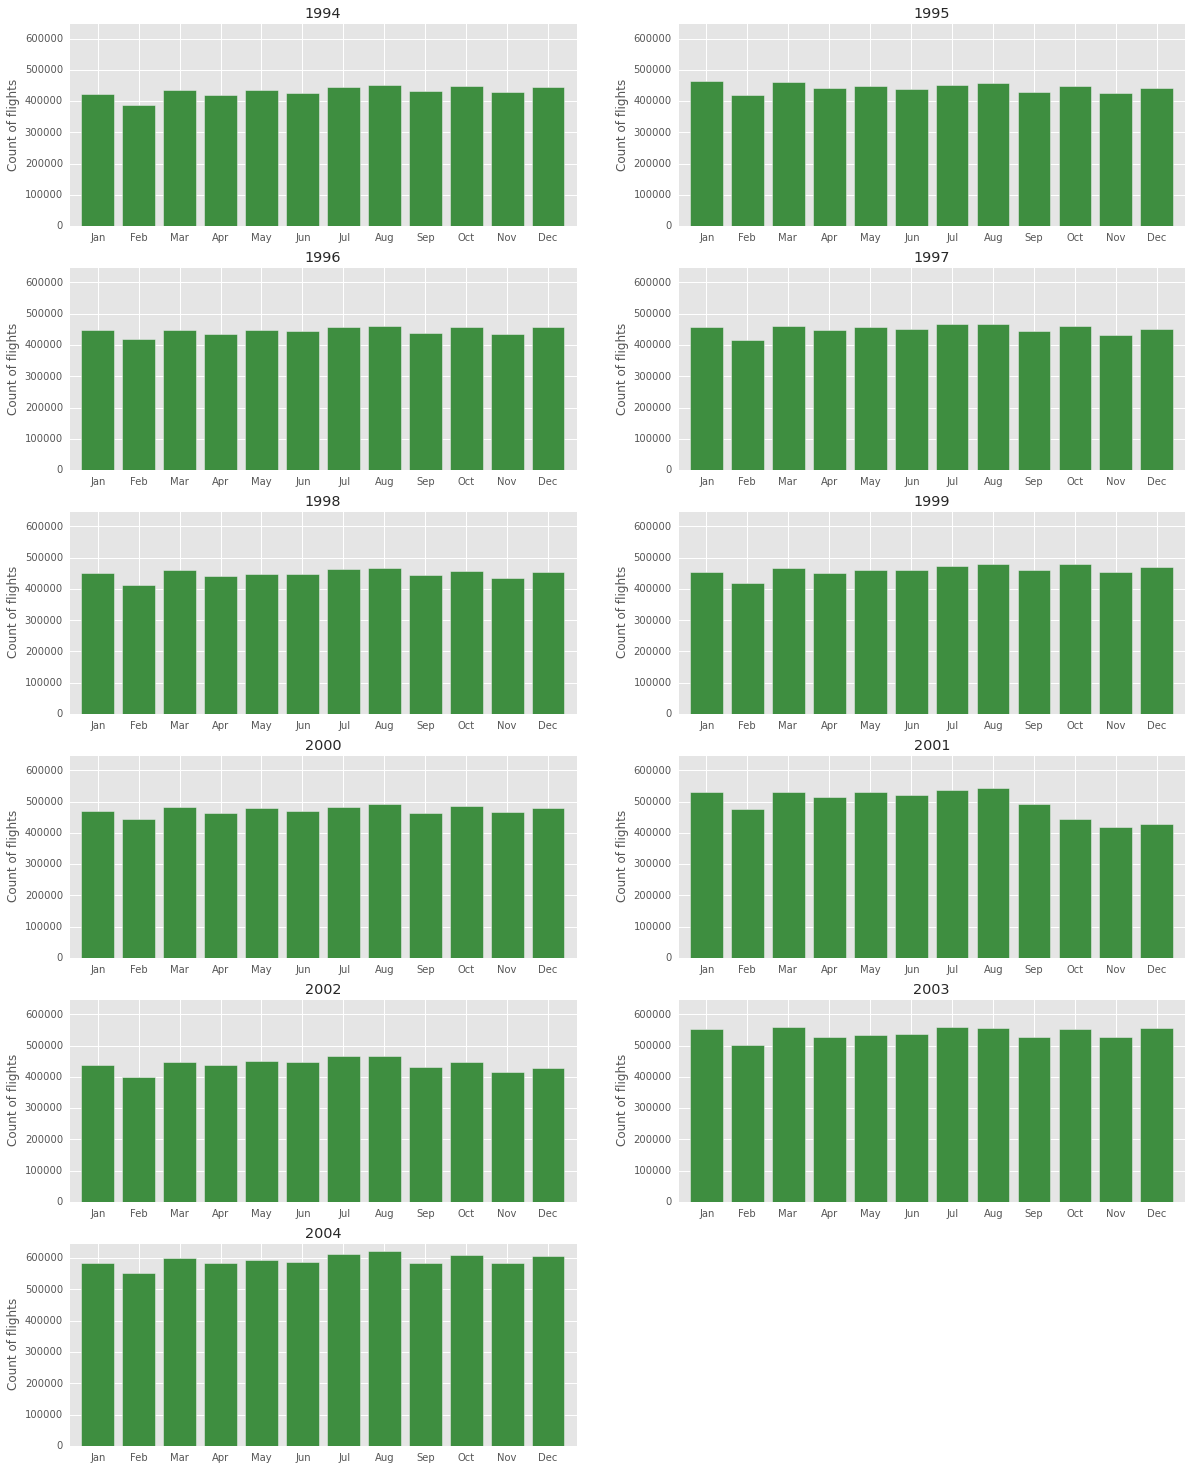

In [91]:
years = [item[0] for item in inbound_per_month.select('year').distinct().collect()]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years.sort()
fig = plt.figure(figsize=(20.0, 25.5))

for i in np.arange(len(years)):
    statistic_month_of_year = inbound_per_month.filter(col('year') == years[i]).orderBy('month')

    # collect data and plot
    pdf = pd.DataFrame(data=statistic_month_of_year.collect())
    plt.subplot(6, 2, i + 1)
    plt.bar(pdf[0], pdf[2], align='center', color='#3E8E40')
    plt.ylim(0, 650000)
    plt.xticks(pdf[0], months)
    plt.ylabel('Count of flights')
    plt.title(years[i])
    plt.margins(0.025, 0)

plt.show()

<div class="alert alert-warning">
It's easily visible a drop in the number of flights after the 9/11, let's plot it in a different way.
</div>

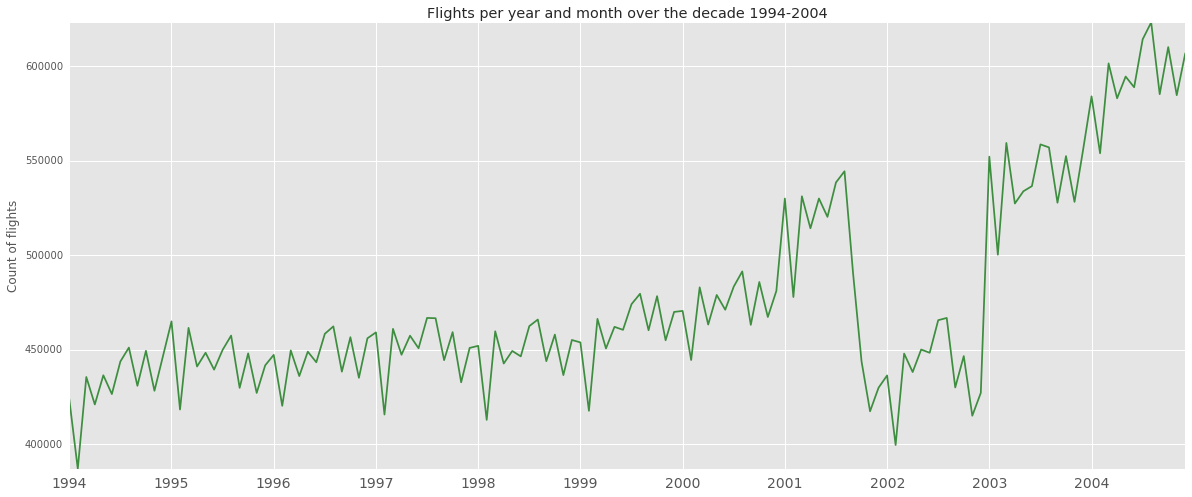

In [92]:
year_with_month = udf(lambda x, y: '%d%02d' % (x, y), StringType())
inbound_per_year_month = inbound_per_month.withColumn('year_month', year_with_month('year', 'month'))\
                                .select('year_month', 'count', 'year', 'month').orderBy('year_month').cache()

# collect data and plot
pdf = pd.DataFrame(data=inbound_per_year_month.collect())

plt.plot(pdf[1], color='#3E8E40')
plt.xticks(np.arange(0, len(pdf[0]), 12), years, fontsize=14)
plt.ylabel('Count of flights')
plt.title('Flights per year and month over the decade 1994-2004')
plt.margins(0, 0)
plt.show()

<div class="alert alert-warning">
In this plot there are too many oscillations, due to the difference in the number of days between the months, therefore we decided to plot it using the average number of flights per day for each month.
</div>

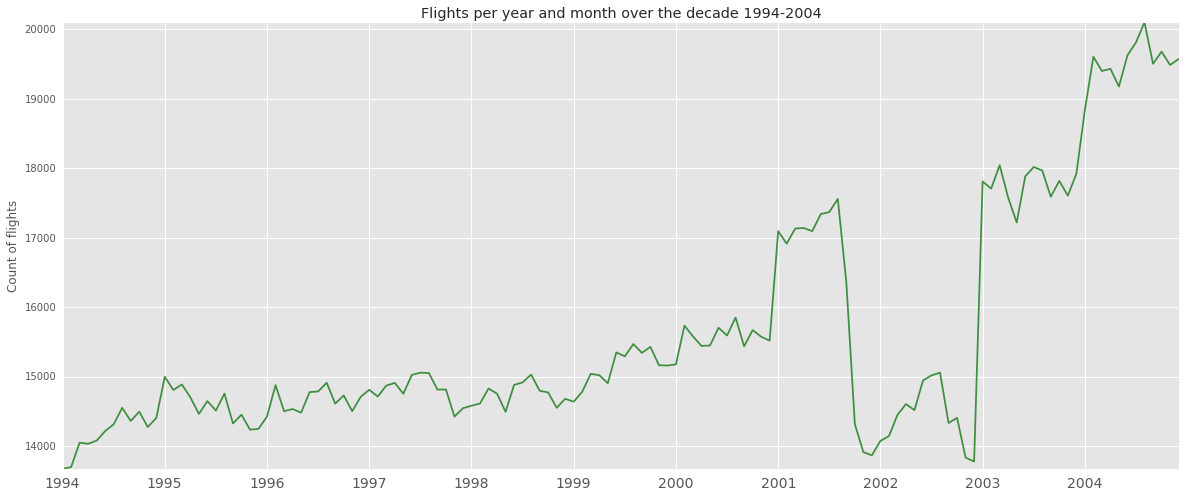

In [93]:
# normalization per days in a month
days_per_month = {1: 31, 2: 28.25, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}
avg_per_days = udf(lambda count, month: count / days_per_month[month], FloatType())

inbound_per_year_month_avg = inbound_per_year_month.withColumn('avg', avg_per_days(col('count'), col('month')))\
                                    .orderBy('year_month').select('year_month', 'avg').cache()

# collect data and plot
pdf = pd.DataFrame(data=inbound_per_year_month_avg.collect())

plt.plot(pdf[1], color='#3E8E40')
plt.xticks(np.arange(0, len(pdf[0]), 12), years, fontsize=14)
plt.ylabel('Count of flights')
plt.title('Flights per year and month over the decade 1994-2004')
plt.margins(0, 0)
plt.show()

<div class="alert alert-warning">
There are less oscillation and it is clearly visible the huge drop after the 9/11. It took almost a year and a half to reach the same flight traffic as before.
</div>

<div class="alert alert-info">
QUESTION: How does the carrier set change throughout the years?
</div>

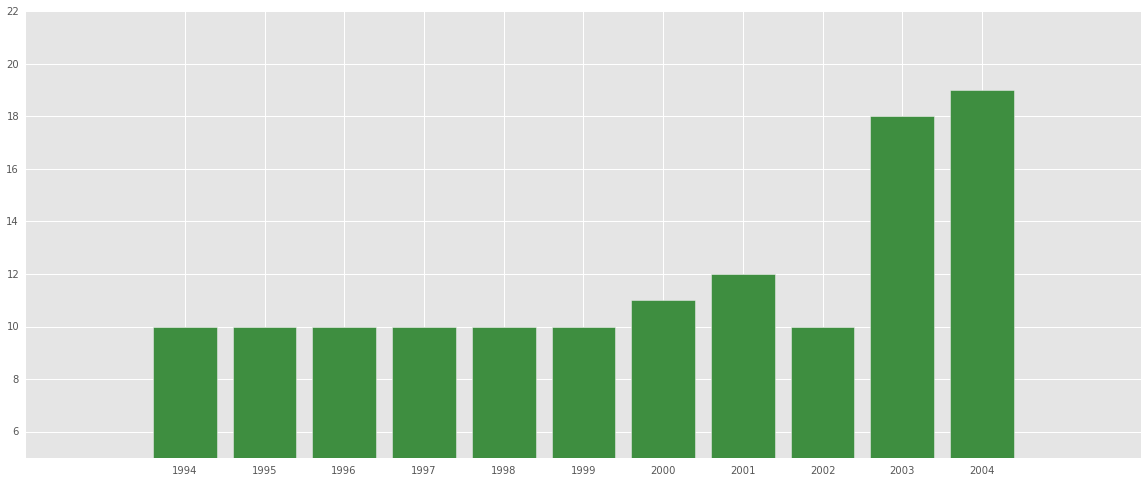

In [94]:
carrier_per_year = df.groupBy('year').agg(countDistinct('carrier').alias('carriers'))\
                        .orderBy('year').cache()
pdf = pd.DataFrame(data = carrier_per_year.collect())

plt.bar(pdf[0], pdf[1], align='center', color='#3E8E40')
plt.ylim(5, 22)
plt.xticks(years)
plt.show()

<div class="alert alert-warning">
For many years the number of carriers was stable, and then there has been a huge increase starting in 2000: in 4 years  the number of carriers doubled.</div>

In [95]:
# what are the companies always present through the decade
carriers_lasting = df.groupBy('carrier').agg(countDistinct('year').alias('years')).filter(col('years') > 10)\
                        .join(carriers_df, col('carrier') == col('Code'))
carriers_lasting.show(truncate=False)

+-------+-----+----+-----------------------------------------------------------------------------------+
|carrier|years|Code|Description                                                                        |
+-------+-----+----+-----------------------------------------------------------------------------------+
|UA     |11   |UA  |United Air Lines Inc.                                                              |
|AA     |11   |AA  |American Airlines Inc.                                                             |
|NW     |11   |NW  |Northwest Airlines Inc.                                                            |
|HP     |11   |HP  |America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.) |
|DL     |11   |DL  |Delta Air Lines Inc.                                                               |
|US     |11   |US  |US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)|
|AS     |11   |AS  |Alaska Airlines Inc.               

+-------+----------+--------+----+---------------------------+
|carrier|start_year|end_year|Code|Description                |
+-------+----------+--------+----+---------------------------+
|UA     |1994      |2004    |UA  |United Air Lines Inc.      |
|AA     |1994      |2004    |AA  |American Airlines Inc.     |
|NW     |1994      |2004    |NW  |Northwest Airlines Inc.    |
|EV     |2003      |2004    |EV  |Atlantic Southeast Airlines|
|B6     |2003      |2004    |B6  |JetBlue Airways            |
+-------+----------+--------+----+---------------------------+
only showing top 5 rows



/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


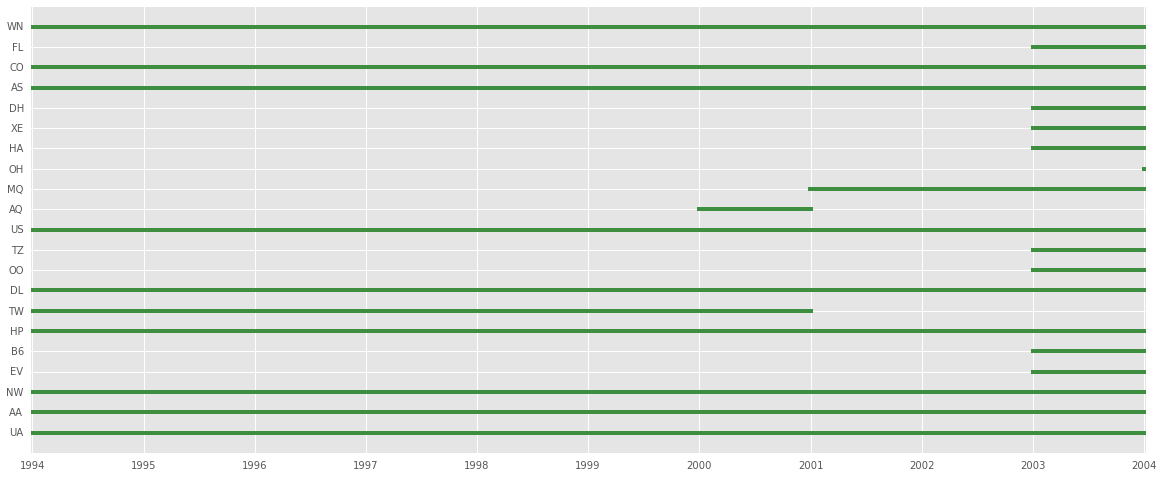

In [98]:
# start year and end year for every company
carriers_life = df.groupBy('carrier').agg(min('year').alias('start_year'), max('year').alias('end_year'))\
                        .join(carriers_df, col('carrier') == col('Code'))
carriers_life.show(5, False)

#Plot function
def timelines(y, xstart, xstop, color='b'):
    """Plot timelines at y from xstart to xstop with given color."""   
    plt.hlines(y, xstart - 0.02, xstop + 0.02, color='#3E8E40', lw=4)
    return

y = np.arange(len(pdf[0]))
x = np.arange(len(years))
pdf = pd.DataFrame(data=carriers_life.collect())
timelines(y, pdf[1], pdf[2])
plt.yticks(y, pdf[0])
plt.xticks(np.arange(1994, 2005, 1))
plt.margins(0, 0.05)
plt.show()

<div class="alert alert-warning">
We can see that 2003 has been a very positive year for carriers, since 8 new carriers faced the market. Over all the decade only two companies failed (or, at least, stopped working).
</div>

<div class="alert alert-info">
Now we can move to the prediction.
</div>

### Preparing the data
#### Calculating the most common value of each feature

<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [99]:
the_most_common_month = (df.groupBy('month').agg(count('*').alias('count')).orderBy(desc('count'))).first()[0]
print("The most common month:", the_most_common_month)

The most common month: 8


<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [100]:
the_most_common_day_of_month = (
    df.groupBy('day_of_month').agg(count('*').alias('count')).orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df.groupBy('day_of_week').agg(count('*').alias('count')).orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 19
The most common day of week: 1


<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [101]:
the_most_common_s_departure_time = (
    df.groupBy('scheduled_departure_time').agg(count('*').alias('count')).orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df.groupBy('scheduled_arrival_time').agg(count('*').alias('count')).orderBy(desc('count'))
    ).first()[0]

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 0


<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [102]:
mean_distance = df.select(mean('distance')).first()[0]
print("mean distance:", mean_distance)

mean distance: 725.005449432039


<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [103]:
mean_arrival_delay = df.select(mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 6.759091745816796


#### Preparing training set and testing set

In [104]:
data = cleaned_data\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]], # src_airport
                map_dest_airports_to_index[values[17]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7, 0.3))

trainingData = trainingData.cache()
testData = testData.cache()

#### Building the decision tree model
<div class="alert alert-warning">
We decided to use the the same parameters as while we were using only data from 1994 in order to compare the two models. Obviously we had to change the value of the parameter `maxBins`.
</div>

In [105]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8:  num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=350)

#### Testing the decision tree model

In [106]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = %.4f' % testMSE)

Test Mean Squared Error = 869.4151


<div class="alert alert-warning">
We have obtained a terrible result, way worse than the one obtained while analyzing only 1994. We could try to use a random forest or different parameters to improve the situation. Anyway we'd probably have other problems, such as performances: running with these parameters was really slow, and it would take a lot of time to run a random forest or a deeper decision tree.
</div>

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/

### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

> The important thing is to not stop questioning. Curiosity has its own reason for existence. (Albert Einstein)

<div class="alert alert-info">
DISCLAIMER: we wanted to focus on 1994 while taking into account all the information about the airplanes, however this has not been possible since the values for 1994 are really bad and many are missing. Thus, we decided to focus on 2004 that is a bit better, even though the values for many airplanes are still missing, as we'll see later in the notebook. For these reasons we decided, in the end, not to use the plane information for the predictor.
</div>

In [61]:
# to start testing, we can focus on a single year
input_path_2004 = "/datasets/airline/2004.csv"
raw_data_2004 = sc.textFile(input_path_2004)

# extract the header
header = raw_data.take(1)[0]

def process_row(line):
    row = list(map(lambda x: x if x != 'NA' else '', line.split(',')))
    return row

# replace invalid data with NULL and remove header
cleaned_data_2004 = (raw_data_2004\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(process_row)
        )
        
print("number of rows after cleaning:", cleaned_data_2004.count())

number of rows after cleaning: 7129270


In [62]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns_2004 = cleaned_data_2004\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0]  else None,
            int(cols[1])  if cols[1]  else None,
            int(cols[2])  if cols[2]  else None,
            int(cols[3])  if cols[3]  else None,
            int(cols[4])  if cols[4]  else None,
            int(cols[5])  if cols[5]  else None,
            int(cols[6])  if cols[6]  else None,
            int(cols[7])  if cols[7]  else None,
            cols[8]       if cols[8]  else None,
            cols[9]       if cols[9]  else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

### 6.2.1. Information about individual planes

In [63]:
# create dataframe df
df_2004 = sqlContext\
        .createDataFrame(cleaned_data_to_columns_2004, airline_data_schema)\
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay', 'distance', 'carrier', 'tail_number', 'src_airport', 'dest_airport')\
        .cache()
df_2004.show(10)

+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+-----------+------------+
|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|carrier|tail_number|src_airport|dest_airport|
+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+-----------+------------+
|2004|    1|          12|          1|                     630|                   915|          -14|     599|     UA|     N805UA|        ORD|         CLT|
|2004|    1|          13|          2|                     630|                   915|           -4|     599|     UA|     N851UA|        ORD|         CLT|
|2004|    1|          14|          3|                     630|                   915|            5|     599|     UA|     N436UA|        ORD|         CLT|
|2004|    1|          15|          4|                     630|              

<div class="alert alert-info">
Let's check if we have the info about the tailnumber for each flight.
</div>

In [64]:
df_2004.filter(col('tail_number').isNull()).count()

127

<div class="alert alert-warning">
There are 127 for which we don't have any information about the tailnumber, we will remove them later while performing the join.
</div>

### Loading plane data

In [65]:
plane_data_df = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='true', delimiter=',', inferSchema=True) \
    .load('plane-data.csv')\
    .filter((col('status') == 'Valid') & col('year').isNotNull() & col('aircraft_type').isNotNull() & col('engine_type').isNotNull())
    
plane_data_df.show()

+-------+-----------+----------------+----------+---------+------+--------------------+-----------+----+
|tailnum|       type|    manufacturer|issue_date|    model|status|       aircraft_type|engine_type|year|
+-------+-----------+----------------+----------+---------+------+--------------------+-----------+----+
| N10156|Corporation|         EMBRAER|02/13/2004|EMB-145XR| Valid|Fixed Wing Multi-...|  Turbo-Fan|2004|
| N102UW|Corporation|AIRBUS INDUSTRIE|05/26/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1998|
| N10323|Corporation|          BOEING|07/01/1997|  737-3TO| Valid|Fixed Wing Multi-...|  Turbo-Jet|1986|
| N103US|Corporation|AIRBUS INDUSTRIE|06/18/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1999|
| N104UA|Corporation|          BOEING|01/26/1998|  747-422| Valid|Fixed Wing Multi-...|  Turbo-Fan|1998|
| N104UW|Corporation|AIRBUS INDUSTRIE|07/02/1999| A320-214| Valid|Fixed Wing Multi-...|  Turbo-Fan|1999|
| N10575|Corporation|         EMBRAER|06/24/2003|EMB-14

In [66]:
flights_plane = df_2004.join(plane_data_df, col('tailnum') == col('tail_number'))\
                .select('tailnum', 'type', 'manufacturer', 'model', 'aircraft_type', 'engine_type', plane_data_df.year,
                        'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time', 
                        'arrival_delay', 'distance', 'carrier', 'src_airport', 'dest_airport').cache()
flights_plane.show(5)

+-------+-----------+----------------+--------+--------------------+-----------+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+------------+
|tailnum|       type|    manufacturer|   model|       aircraft_type|engine_type|year|month|day_of_month|day_of_week|scheduled_departure_time|scheduled_arrival_time|arrival_delay|distance|carrier|src_airport|dest_airport|
+-------+-----------+----------------+--------+--------------------+-----------+----+-----+------------+-----------+------------------------+----------------------+-------------+--------+-------+-----------+------------+
| N805UA|Corporation|AIRBUS INDUSTRIE|A319-131|Fixed Wing Multi-...|  Turbo-Jet|1998|    1|          12|          1|                     630|                   915|          -14|     599|     UA|        ORD|         CLT|
| N851UA|Corporation|          AIRBUS|A319-131|Fixed Wing Multi-...|  Turbo-Jet|2002|    1|          13|          2|

#### Counting the number of planes
<div class="alert alert-info">
Let's count how many flights we have "lost" due to the absence of information about the tailnumber.
</div>

In [114]:
num_flights_2004 = df_2004.count()
num_flights_2004_plane = flights_plane.count()
print("Number of flight we will not consider due to absence information: " + str(num_flights_2004-num_flights_2004_plane))
print("Number of flights: " + str(num_flights_2004))
print("Percentage of \"lost\" flights: %.4f" %(100*(num_flights_2004-num_flights_2004_plane)/num_flights_2004) )

Number of flight we will not consider due to absence information: 2597749
Number of flights: 7129270
Percentage of "lost" flights: 36.4378


<div class="alert alert-warning">
We can see that the dataset containing all the information about the airplanes does not contain many of the airplanes that have been flying in 2004: we lose 2597749 flights out of 7129270, that is the 36.4378% of all the flights, a really huge percentage. We try to search the internet for a dataset with more information but we did not find anything that could help us.
</div>
<div class="alert alert-info">
QUESTION: how many airplanes have been used in 2004 (considering all the airplanes for which we have the information).
</div>

In [115]:
#flights_plane.select('tailnum').distinct().show()
print('Number of different tails in 2004:', flights_plane.select('tailnum').distinct().count())

Number of different tails in 2004: 3318


<div class="alert alert-info">
QUESTION: Analyze the characteristics of the planes that have been used during this year (type, engine type, model).
</div>

+------------------------+-------+
|aircraft_type           |count  |
+------------------------+-------+
|Rotorcraft              |3250   |
|Fixed Wing Multi-Engine |4496192|
|Fixed Wing Single-Engine|28269  |
|Balloon                 |3810   |
+------------------------+-------+



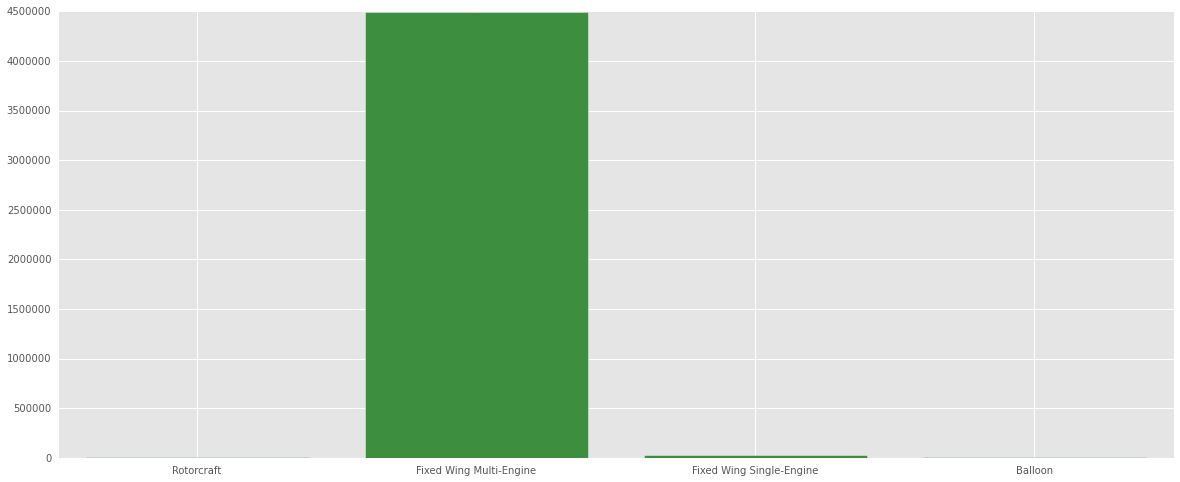

In [121]:
# number of flights per airplane type
aircraft_types = flights_plane.groupBy('aircraft_type').count()
aircraft_types.show(truncate=False)

pdf = pd.DataFrame(data=aircraft_types.collect())
plt.bar(np.arange(len(pdf[0])), pdf[1], align='center', color='#3E8E40')
plt.xticks(np.arange(len(pdf[0])), pdf[0])
plt.show()

<div class="alert alert-warning">
The Fixed-wing multi-engine is by far the most common type, the others are way less common since they are not used for most of the trips.  
</div>

+-------------+-------+
|engine_type  |count  |
+-------------+-------+
|None         |3810   |
|4 Cycle      |3485   |
|Turbo-Shaft  |3250   |
|Turbo-Fan    |2660711|
|Turbo-Prop   |207906 |
|Reciprocating|29387  |
|Turbo-Jet    |1622972|
+-------------+-------+



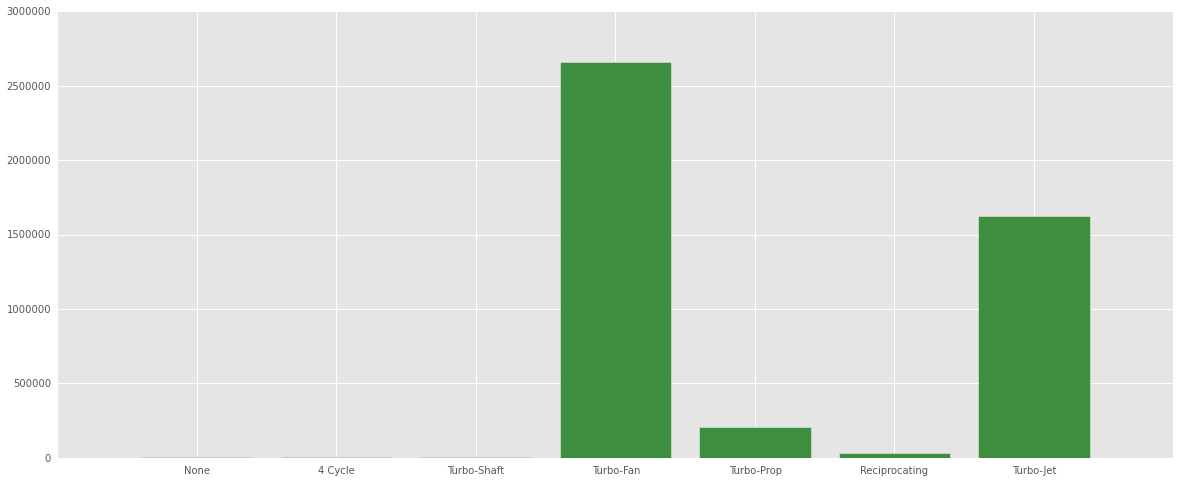

In [122]:
# number of flights per engine types
engine_types = flights_plane.groupBy('engine_type').count()
engine_types.show(truncate=False)

pdf = pd.DataFrame(data=engine_types.collect())
plt.bar(np.arange(len(pdf[0])), pdf[1], align='center', color='#3E8E40')
plt.xticks(np.arange(len(pdf[0])), pdf[0])
plt.show()

<div class="alert alert-warning">
Looking at the engine type, the situation is similar: *Turbo-fan* and *Turbo-jet* are by far the most common engine types, all the other types are rarely used. *Balloons* are, obviously, the only ones without engine.
</div>

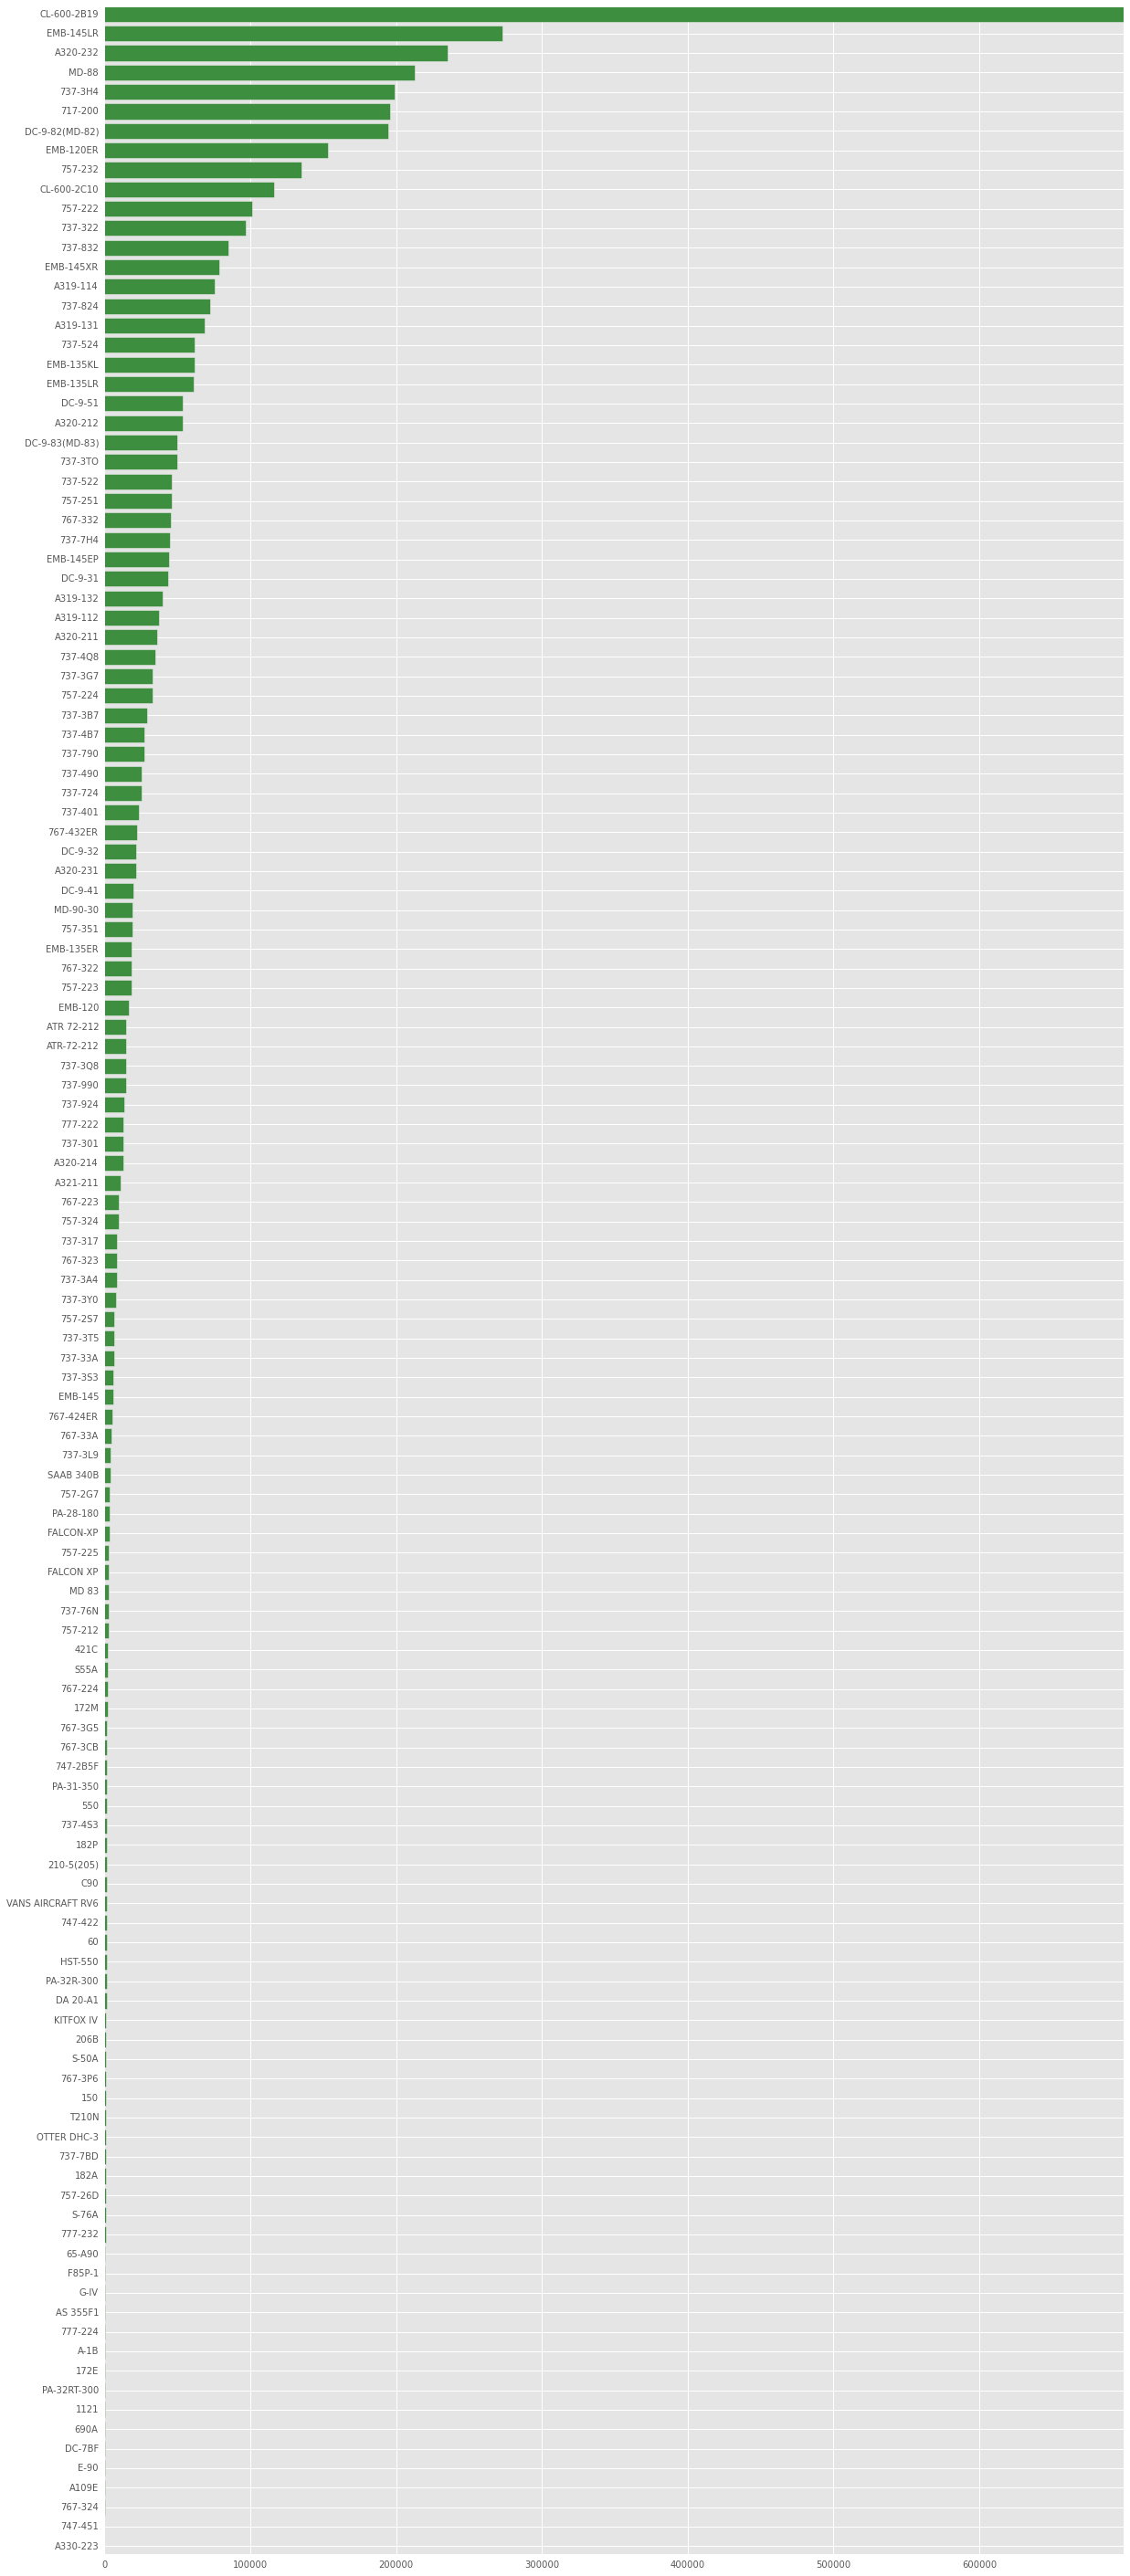

In [123]:
# number of flights per model
plane_models = flights_plane.groupBy('model').count().orderBy('count')

fig = plt.figure(figsize=(20, 50))

pdf = pd.DataFrame(data=plane_models.collect())
plt.barh(np.arange(len(pdf[0])), pdf[1], align='center', color='#3E8E40')
plt.yticks(np.arange(len(pdf[0])), pdf[0])
plt.margins(0, 0)
plt.show()

In [124]:
flights_plane.groupBy('model').count().orderBy(desc('count')).show()

+--------------+------+
|         model| count|
+--------------+------+
|   CL-600-2B19|699187|
|     EMB-145LR|273222|
|      A320-232|235420|
|         MD-88|212885|
|       737-3H4|199174|
|       717-200|195602|
|DC-9-82(MD-82)|194893|
|     EMB-120ER|153347|
|       757-232|135023|
|   CL-600-2C10|116496|
|       757-222|101576|
|       737-322| 96964|
|       737-832| 84704|
|     EMB-145XR| 78858|
|      A319-114| 75674|
|       737-824| 72553|
|      A319-131| 68629|
|       737-524| 61802|
|     EMB-135KL| 61545|
|     EMB-135LR| 61314|
+--------------+------+
only showing top 20 rows



<div class="alert alert-warning">
Also looking at the model, same way as it was the case for type and engine-type, we can see that there is a predominance of a couple of model over the others: in this case, the *CL-600-2B19* is by far the most common model (used twice more than the second most common), and the utilization of the different models follows a 80-20-like rule. 
</div>
<div class="alert alert-info">
QUESTION: How old are the planes flying in 2004?
</div>

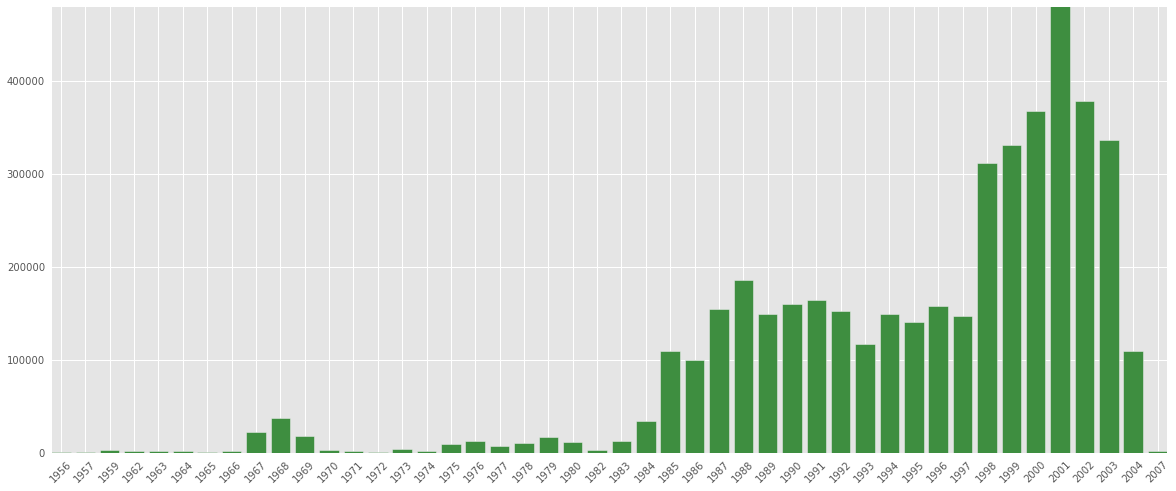

In [125]:
aircraft_years = flights_plane.filter((col('year') != '0000') & (col('year') != 'None'))\
                              .groupBy('year').count().orderBy('year')
pdf = pd.DataFrame(data=aircraft_years.collect())
plt.bar(np.arange(len(pdf[0])), pdf[1], align='center', color='#3E8E40')
plt.xticks(np.arange(len(pdf[0])), pdf[0], rotation = 45)
plt.margins(0, 0)
plt.show()

<div class="alert alert-warning">
Most of the flying planes are very young (just a couple of years) and only a bunch of planes is old or very old (there are planes built in 1959 that are still flying!).
We can also see that there is some problem in the data we are using: apparently there are planes built in 2007 that are flying in 2004, and this definitely does not make sense...
</div>

In [126]:
aircraft_years.filter(col('year') == 2007).show()

+----+-----+
|year|count|
+----+-----+
|2007| 1765|
+----+-----+



<div class="alert alert-warning">
Yes, there are 1765 planes built in 2007 that are flying in 2004 accordingly to the data, this cannot be true obviously and must be due to some error in the dataset.
</div>

<div class="alert alert-info">
QUESTION: Which airplanes are the most used? (considering the number of flights, not the actual distance they have flied).
</div>

In [69]:
# the airplane with most flights in 2004
airplane_flight_count = flights_plane.groupBy('tailnum').count().orderBy(desc('count'))
airplane_flight_count.show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N308SW| 4734|
| N481HA| 3734|
| N487HA| 3708|
| N485HA| 3662|
| N486HA| 3651|
| N480HA| 3622|
| N476HA| 3586|
| N479HA| 3549|
| N478HA| 3458|
| N475HA| 3430|
| N477HA| 3358|
| N484HA| 3277|
| N393SW| 3218|
| N229SW| 3157|
| N220SW| 3110|
| N218SW| 3082|
| N232SW| 3078|
| N297SW| 3077|
| N227SW| 3066|
| N289YV| 3040|
+-------+-----+
only showing top 20 rows



<div class="alert alert-info">
QUESTION: What about the delay for each airplane?
</div>

In [70]:
airplane_total_delay = flights_plane.groupBy('tailnum')\
                                    .agg(sum('arrival_delay').alias('total_delay')).orderBy(desc('total_delay'))

# showing most reliable planes
print("The most reliable aiplanes:")
airplane_average_delay = airplane_flight_count.join(airplane_total_delay, 'tailnum')\
        .withColumn('avg_delay', col('total_delay') / col('count'))\
        .orderBy(desc('avg_delay'))
airplane_average_delay.select('tailnum','count','avg_delay').show()

print("The reliability of the most used planes")
# showing the reliability of the most used planes
airplane_average_delay.select('tailnum','count','avg_delay').orderBy(desc('count')).show()

The most reliable aiplanes:
+-------+-----+------------------+
|tailnum|count|         avg_delay|
+-------+-----+------------------+
| N854NW|    1|              67.0|
| N852NW|    7| 41.57142857142857|
| N37018|   37| 39.08108108108108|
| N408CA|    1|              38.0|
| N180UA|   54| 33.44444444444444|
| N121UA|   69|30.217391304347824|
| N78003|   29| 28.79310344827586|
| N196UA|   56|28.696428571428573|
| N173UA|  102|28.215686274509803|
| N179UA|   58|27.482758620689655|
| N14174|   74| 26.41891891891892|
| N77014|   36| 26.36111111111111|
| N178UA|   59|25.966101694915253|
| N120UA|   47|25.617021276595743|
| N105UA|   25|              25.6|
| N14173|  109|24.486238532110093|
| N116UA|   52|23.942307692307693|
| N505AE|  870|23.567816091954022|
| N599JB|   43| 22.86046511627907|
| N195UA|   41|22.195121951219512|
+-------+-----+------------------+
only showing top 20 rows

The reliability of the most used planes
+-------+-----+-------------------+
|tailnum|count|          avg_d

<div class="alert alert-warning">
We obtained very a very interesting result: if we focus on the most used planes we can see that the *average_delay* is usually very low, and many times is even lower than 0!
<br/>
We should just be careful while considering the average delay since there are many planes with only a couple of flights and in those cases the delay could be either 0 or very high.
</div>

<div class="alert alert-info">
QUESTION: How many planes, on average, arrive earlier than expected?
</div>

In [71]:
# most efficient plane, the one with most flights and less delay
number_most_reliable_planes = airplane_average_delay.filter(col('avg_delay') < 0).orderBy('avg_delay').count()
number_most_reliable_planes_365 = airplane_average_delay.filter(col('avg_delay') < 0)\
                    .filter(col('count') > 365).orderBy('avg_delay').count()

print("There are %d airplanes that, on average, arrive earlier than expected." %number_most_reliable_planes)
print("If we consider the airplanes with at least 365 flights, this value becomes: %d" %number_most_reliable_planes_365)
airplane_average_delay.filter(col('avg_delay').isNotNull()).orderBy('avg_delay').show(10)

There are 53 airplanes that, on average, arrive earlier than expected.
If we consider the airplanes with at least 365 flights, this value becomes: 47
+-------+-----+-----------+-------------------+
|tailnum|count|total_delay|          avg_delay|
+-------+-----+-----------+-------------------+
| N857NW|    1|        -15|              -15.0|
| N487HA| 3708|     -13348|-3.5997842502696873|
| N486HA| 3651|     -12105| -3.315529991783073|
| N478HA| 3458|     -11328| -3.275882012724118|
| N476HA| 3586|     -11336|-3.1611823759063022|
| N475HA| 3430|     -10732| -3.128862973760933|
| N480HA| 3622|     -11045|-3.0494202098288237|
| N485HA| 3662|     -11156| -3.046422719825232|
| N477HA| 3358|      -9788|-2.9148302561048243|
| N481HA| 3734|      -9702| -2.598286020353508|
+-------+-----+-----------+-------------------+
only showing top 10 rows



<div class="alert alert-warning">
Yes, there are 53 planes that, on average, arrive earlier than expected. Anyway we should consider only the planes with a number of flights quite high, as we said before, and we have chosen 365 flights as threshold (one per day). In this case the number of "very efficient" planes is reduced to 47 (bigger than what we expected actually).
</div>

<div class="alert alert-info">
QUESTION: Knowing the tailnumbers for the *best* planes, could we find which brand/type of plane are the best for the job?
</div>

In [84]:
best_planes = airplane_average_delay.filter(col('avg_delay') < 0)\
                    .filter(col('count') >= 365).orderBy('avg_delay')\
                    .select('tailnum').distinct().join(plane_data_df, 'tailnum').cache()

In [86]:
best_planes.groupBy('manufacturer', 'engine_type').agg(count('*').alias('num_planes')).orderBy(desc('num_planes')).show()

+----------------+-----------+----------+
|    manufacturer|engine_type|num_planes|
+----------------+-----------+----------+
|          BOEING|  Turbo-Fan|        15|
|AIRBUS INDUSTRIE|  Turbo-Jet|        13|
|          AIRBUS|  Turbo-Fan|         6|
|          BOEING|  Turbo-Jet|         6|
|  BOMBARDIER INC|  Turbo-Fan|         5|
|         EMBRAER| Turbo-Prop|         1|
|     SAAB-SCANIA| Turbo-Prop|         1|
+----------------+-----------+----------+



### 6.2.2. Weather data from NOAA - National Centers for Environmental Information

We downloaded data from the [NOAA](https://www.ncdc.noaa.gov/) for the year 1994. All this information is stored in `weather-stations.csv`. This file contains for each day of the year and for every station (airport) several information:
* minimum and maximum temperature
* precipitations (in mm)
* snow and snow depth
* average wind
And others, which won't be used because they are too sparse and unreliable for builind up our predictor.

There is also another file, called `airport_stations.csv`, which maps the airport codes with the code used by the NOAA dataset.

In [8]:
weather_df = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='true', delimiter=',', inferSchema=True) \
    .load('weather-stations.csv')
airport_stations = sqlContext.read \
    .format('com.databricks.spark.csv') \
    .options(header='true', delimiter=',', inferSchema=True) \
    .load('airport_stations.csv')

Here we map our `weather_df` with the airport code and we rename the columns in order not to have duplicates while joining the flights dataset.

In [9]:
# 'STATION', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE'
# 'TMIN', 'TMAX', 'PRCP', 'SNOW', 'SNWD' = snow depth, 'AWND' = avg wind, 
# 'WDF1' = direction of fastest 1-minute wind , 'WSF1' = Fastest 1-minute wind speed
get_year = udf(lambda x: int(str(x)[0:4]))
get_month = udf(lambda x: int(str(x)[4:6]))
get_day = udf(lambda x: int(str(x)[6:8]))

src_airport_weather_df = weather_df.select(col('station').alias('src_station'),
                    col('elevation').alias('src_elevation'), col('latitude').alias('src_latitude'),
                    col('longitude').alias('src_longitude'), col('date'),
                    col('tmin').alias('src_tmin'), col('tmax').alias('src_tmax'),
                    col('prcp').alias('src_prcp'), col('snow').alias('src_snow'),
                    col('snwd').alias('src_snwd'), col('tsun').alias('src_tsun'),
                    col('awnd').alias('src_awnd'), col('wdf1').alias('src_wdf1'),
                    col('wsf1').alias('src_wsf1')
                )\
                .join(airport_stations, col('src_station') == col('station_id'))\
                .withColumnRenamed('code', 'src_code')\
                .withColumn('year', get_year(col('date')))\
                .withColumn('month', get_month(col('date')))\
                .withColumn('day', get_day(col('date')))\
                .drop('station_id', 'src_station', 'date').cache()
                
dest_airport_weather_df = weather_df.select(col('station').alias('dest_station'),
                    col('elevation').alias('dest_elevation'), col('latitude').alias('dest_latitude'),
                    col('longitude').alias('dest_longitude'), col('date'),
                    col('tmin').alias('dest_tmin'), col('tmax').alias('dest_tmax'),
                    col('prcp').alias('dest_prcp'), col('snow').alias('dest_snow'),
                    col('snwd').alias('dest_snwd'), col('tsun').alias('dest_tsun'),
                    col('awnd').alias('dest_awnd'), col('wdf1').alias('dest_wdf1'),
                    col('wsf1').alias('dest_wsf1')
                )\
                .join(airport_stations, col('dest_station') == col('station_id'))\
                .withColumnRenamed('code', 'dest_code')\
                .withColumn('year', get_year(col('date')))\
                .withColumn('month', get_month(col('date')))\
                .withColumn('day', get_day(col('date')))\
                .drop('station_id', 'dest_station', 'date').cache()

Here we quickly show the goodness of our data, by checking how many airports do not have information related to snow data and for how many days in the year.

In [11]:
airports_no_snow_data = src_airport_weather_df.filter(col('src_snow').isNull() & col('src_snwd').isNull()).groupBy('src_code').count()
airports_no_snow_data.join(airports_df, col('src_code') == airports_df.code).select('code', 'name', 'city', 'count')\
                .filter(col('count') > 300).show(1000, False) # ignore missing data for few days

src_airport_weather_df.filter((col('src_code') == 'LGB') & col('src_snow').isNull() & col('src_snwd').isNull())\
            .groupBy('src_code', 'month').agg(count('*').alias('count')).show()
src_airport_weather_df.filter((col('src_code') == 'DEN') & col('src_snow').isNull() & col('src_snwd').isNull())\
            .groupBy('src_code', 'month').agg(count('*').alias('count')).show()

+----+------------------------------------------------+----------------+-----+
|code|name                                            |city            |count|
+----+------------------------------------------------+----------------+-----+
|DLG |Dillingham Airport                              |Dillingham      |365  |
|IDA |Idaho Falls Regional Airport                    |Idaho Falls     |365  |
|PSG |Petersburg James A Johnson Airport              |Petersburg      |365  |
|BTM |Bert Mooney Airport                             |Butte           |364  |
|COD |Yellowstone Regional Airport                    |Cody            |365  |
|MLU |Monroe Regional Airport                         |Monroe          |365  |
|WRG |Wrangell Airport                                |Wrangell        |363  |
|KTN |Ketchikan International Airport                 |Ketchikan       |365  |
|CDV |Merle K (Mudhole) Smith Airport                 |Cordova         |365  |
|HPN |Westchester County Airport                    

<div class="alert alert-warning">
We can see that there is a quite big number of airports without information about the snow for more than 300 days. Some of them is close to the sea or, however, in regions that are likely not to see the snow. Anyway some of them are in parts of the US where the snow is often present (such as Dillingham, in Alaska), but most of these are small airports.
<br/><br/>Anyway we should take into account that this dataset is not as good as we hoped it was.
</div>

Now we are going to perform the join to connect airport information and weather information. We are performing an inner join, thus we are losing some of the flights.

In [12]:
df_weather = df\
    .join(src_airport_weather_df, ((col('src_code') == col('src_airport')) & (src_airport_weather_df.year == df.year) & (src_airport_weather_df.month == df.month) & (src_airport_weather_df.day == df.day_of_month)))\
    .join(dest_airport_weather_df, ((col('dest_code') == col('dest_airport')) & (dest_airport_weather_df.year == df.year) & (dest_airport_weather_df.month == df.month) & (dest_airport_weather_df.day == df.day_of_month)))

In [90]:
print("Number of lost flights: %d" % (df.count() - df_weather.count()))
print("Percentage of lost flights: %.2f" %( 100*(df.count() - df_weather.count())/ df.count()))

Number of lost flights: 638222
Percentage of lost flights: 12.32


In [91]:
# look for how many flights don't have at least data for snow
flights_no_snow_data = df_weather.filter(col('src_snow').isNull() & col('src_snwd').isNull() & col('dest_snow').isNull() & col('dest_snwd').isNull())
print('Number of flights that don\'t have snow data: %d out of %d' % (flights_no_snow_data.count(), df_weather.count()))

Number of flights that don't have snow data: 7734 out of 4541826


<div class="alert alert-warning">
This number is not so big, therefore this missing information should not have a huge impact on the performances of the predictor.
</div>

<div class="alert alert-info">
We consider delay only when the overall delay is greater or equal to 15 minutes.
</div>

In [39]:
delay = 15

In [40]:
delay_snow = df_weather.filter((col('src_snow') + col('src_snwd') + col('dest_snow') + col('dest_snwd') > 1) & (col('arrival_delay') >= delay)).cache()
delay_snow.select('day_of_month', df.month, 'src_airport', 'dest_airport', 'src_snow', 'src_snwd', 'dest_snow', 'dest_snwd', 'arrival_delay').show()

+------------+-----+-----------+------------+--------+--------+---------+---------+-------------+
|day_of_month|month|src_airport|dest_airport|src_snow|src_snwd|dest_snow|dest_snwd|arrival_delay|
+------------+-----+-----------+------------+--------+--------+---------+---------+-------------+
|           8|    1|        CLT|         CAE|     0.0|     0.0|    100.0|     80.0|           54|
|          12|    1|        CLT|         CAE|     0.0|     0.0|    100.0|    100.0|           21|
|          18|    1|        CLT|         CAE|     0.0|     0.0|     10.0|     30.0|           89|
|          19|    1|        CLT|         CAE|     0.0|     0.0|     10.0|     10.0|           25|
|          26|    1|        CLT|         CAE|     0.0|     0.0|    100.0|    100.0|           15|
|          27|    1|        CLT|         CAE|     0.0|     0.0|    100.0|    100.0|           22|
|          28|    1|        CLT|         CAE|     0.0|     0.0|    100.0|    100.0|           15|
|           3|    1|

In [41]:
delay_no_snow = df_weather.filter((col('src_snow') + col('src_snwd') + col('dest_snow') + col('dest_snwd') < 1) & (col('arrival_delay') >= delay)).cache()
delay_no_snow.select('day_of_month', df.month, 'src_airport', 'dest_airport', 'src_snow', 'src_snwd', 'dest_snow', 'dest_snwd', 'arrival_delay').show()

+------------+-----+-----------+------------+--------+--------+---------+---------+-------------+
|day_of_month|month|src_airport|dest_airport|src_snow|src_snwd|dest_snow|dest_snwd|arrival_delay|
+------------+-----+-----------+------------+--------+--------+---------+---------+-------------+
|          10|    1|        CLT|         ORF|     0.0|     0.0|      0.0|      0.0|           20|
|          11|    1|        CLT|         ORF|     0.0|     0.0|      0.0|      0.0|           88|
|          12|    1|        CLT|         ORF|     0.0|     0.0|      0.0|      0.0|           21|
|          28|    1|        CLT|         ORF|     0.0|     0.0|      0.0|      0.0|           17|
|          28|    1|        MCO|         CLT|     0.0|     0.0|      0.0|      0.0|           27|
|          22|    1|        CLT|         CAE|     0.0|     0.0|      0.0|      0.0|           33|
|           2|    1|        ORD|         CLT|     0.0|     0.0|      0.0|      0.0|           19|
|           4|    1|

<div class="alert alert-info">
QUESTION: how many delays in snow conditions?
</div>

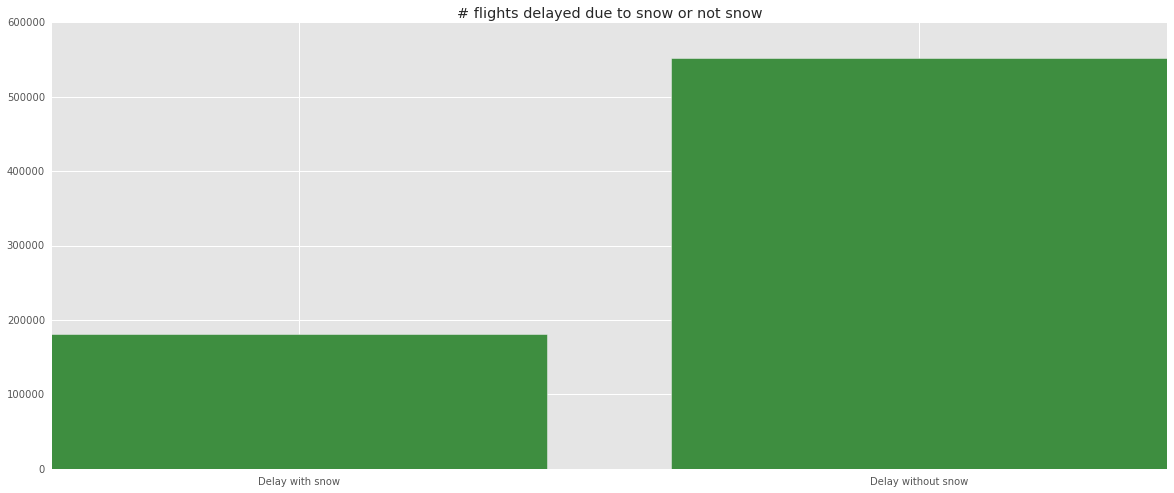

In [42]:
plt.figure()
plt.title('# flights delayed due to snow or not snow')
plt.bar([0, 1], [delay_snow.count(), delay_no_snow.count()], align='center', color='#3E8E40')
plt.xticks([0, 1], ['Delay with snow', 'Delay without snow'])
plt.show()

<div class="alert alert-warning">
We should underline that we are **not** sure about the cause of the delay, anyway we can observe that around one fourth of the delays happened in snowy conditions.
</div>
<div class="alert alert-info">
QUESTION: what about rainy days?
</div>

In [43]:
delay_rain = delay_no_snow.filter((col('src_prcp') + col('dest_prcp')) >= 1).cache()
delay_no_rain = delay_no_snow.filter((col('src_prcp') + col('dest_prcp')) < 1).cache()
delay_rain.select('day_of_month', df.month, 'src_airport', 'dest_airport', 'src_prcp', 'dest_prcp', 'arrival_delay').show()

+------------+-----+-----------+------------+--------+---------+-------------+
|day_of_month|month|src_airport|dest_airport|src_prcp|dest_prcp|arrival_delay|
+------------+-----+-----------+------------+--------+---------+-------------+
|          12|    1|        CLT|         ORF|    20.1|     14.2|           21|
|          28|    1|        CLT|         ORF|    17.3|     13.5|           17|
|          28|    1|        MCO|         CLT|     0.0|     17.3|           27|
|           4|    1|        PBI|         PHL|     0.0|     13.0|           35|
|          25|    1|        PBI|         PHL|     0.0|      2.8|           19|
|           7|    1|        PHL|         GSO|     4.8|      5.8|          349|
|          12|    1|        PHL|         GSO|    10.9|     24.9|           33|
|          30|    1|        PHL|         GSO|     0.0|      1.0|           15|
|           6|    1|        IND|         BWI|     1.3|      0.0|           42|
|          25|    1|        IND|         BWI|     7.

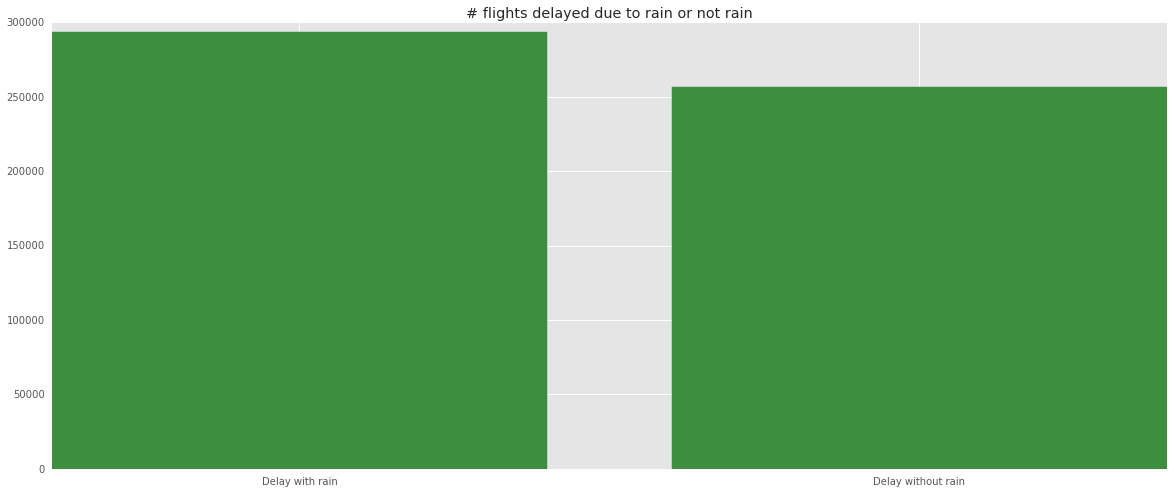

In [44]:
plt.figure()
plt.title('# flights delayed due to rain or not rain')
plt.bar([0, 1], [delay_rain.count(), delay_no_rain.count()], align='center', color='#3E8E40')
plt.xticks([0, 1], ['Delay with rain', 'Delay without rain'])
plt.show()

<div class="alert alert-warning">
More than half of the delays happened in rain conditions, thus we can reasonably think that it has an important impact on the delay itself.
<br/><br/>
It is important to notice that we have considered snow more important than rain, for the delays (while computing the amount of delays in rain condition we were not considering snowy days, even though we could have both rain and snow in the same day).
</div>

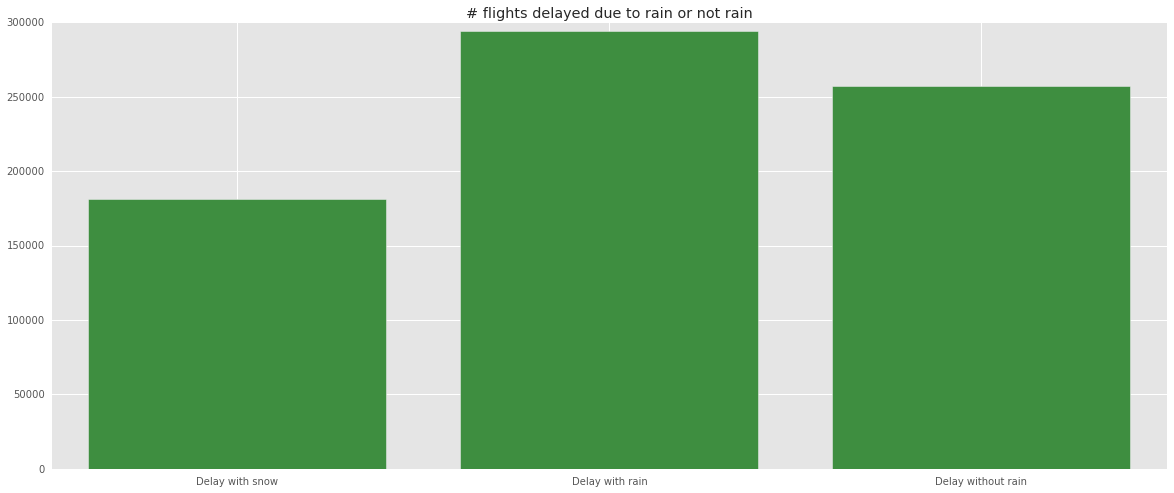

In [45]:
plt.figure()
plt.title('# flights delayed due to rain or not rain')
plt.bar([0, 1, 2], [delay_snow.count(), delay_rain.count(), delay_no_rain.count()], align='center', color='#3E8E40')
plt.xticks([0, 1, 2], ['Delay with snow', 'Delay with rain', 'Delay without rain'])
plt.show()

<div class="alert alert-warning">
In this plot we are showing a recap of the previous plot: we can notice that most of the delays happen in adverse weather conditions, thus we can conclude that, reasonably, the weather condition is pretty important for the delays of flights.
</div>

In [46]:
# No delay with snow or rain
delay_no_snow_rain = df_weather\
    .filter((col('src_snow') + col('src_snwd') + col('dest_snow') + col('dest_snwd') + col('src_prcp') + col('dest_prcp') < 1) & (col('arrival_delay') >= delay))\
    .cache()
delay_no_snow_rain.select('day_of_month', df.month, 'src_airport', 'dest_airport', 'arrival_delay').show()
print('# of flights with delay not due to snow and/or rain:', delay_no_snow_rain.count())

+------------+-----+-----------+------------+-------------+
|day_of_month|month|src_airport|dest_airport|arrival_delay|
+------------+-----+-----------+------------+-------------+
|          10|    1|        CLT|         ORF|           20|
|          11|    1|        CLT|         ORF|           88|
|          22|    1|        CLT|         CAE|           33|
|           2|    1|        ORD|         CLT|           19|
|           5|    1|        PHL|         GSO|           20|
|          23|    1|        PHL|         GSO|           62|
|           2|    1|        IND|         BWI|           37|
|          11|    1|        IND|         BWI|           33|
|          13|    1|        DCA|         CLT|           22|
|           5|    1|        PHL|         STL|           21|
|           5|    1|        GSO|         DCA|          192|
|          16|    1|        CLT|         BNA|           27|
|           5|    1|        IAH|         PHL|           28|
|          31|    1|        LGA|        

<div class="alert alert-warning">
We can therefore think that the weather condition is one of the most important aspects (if not the most important) while analyzing the delays.
</div>

In [47]:
# flights with no delay but in bad weather conditions
no_delay_snow_rain = df_weather\
    .filter((col('src_snow') + col('src_snwd') + col('dest_snow') + col('dest_snwd') + col('src_prcp') + col('dest_prcp') > 1) & (col('arrival_delay') < delay))\
    .cache()
no_delay_snow_rain.select('day_of_month', df.month, 'src_airport', 'dest_airport', 'arrival_delay').show()
print('# of flights with no delay even though there is snow or rain:', no_delay_snow_rain.count())

+------------+-----+-----------+------------+-------------+
|day_of_month|month|src_airport|dest_airport|arrival_delay|
+------------+-----+-----------+------------+-------------+
|           7|    1|        CLT|         ORF|           -9|
|           8|    1|        CLT|         ORF|          -11|
|          14|    1|        CLT|         ORF|            2|
|          15|    1|        CLT|         ORF|            1|
|          17|    1|        CLT|         ORF|           -8|
|          18|    1|        CLT|         ORF|           -4|
|          22|    1|        CLT|         ORF|           -2|
|          25|    1|        CLT|         ORF|          -11|
|          27|    1|        CLT|         ORF|            5|
|          31|    1|        CLT|         ORF|            3|
|           1|    1|        MCO|         CLT|            2|
|           2|    1|        MCO|         CLT|           -2|
|           3|    1|        MCO|         CLT|           -1|
|           4|    1|        MCO|        

<div class="alert alert-warning">
This last table is very important since it shows how snow and rain are not always impacting the delay of the flights, and this should be taken intoaccount in the predictor (i.e. we cannot use only the weather condition to perform the prediction).
</div>

#### Predictor with weather data: preparing data

We performed the same step we used for the previous predictor.

<div class="alert alert-info" style="margin-top: 20px">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>


In [18]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common airport will be on the top
stat_src = (
    df_weather
        .groupBy('src_airport')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

# test the dictionary
print(map_src_airport_to_index['ORD'])
print(map_src_airport_to_index['ATL'])

0
2


<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [19]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df_weather
        .groupBy('dest_airport')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
map_dest_airports_to_index = dict(zip(dest_airports, range(num_dest_airports)))

# test the dictionary
print(map_dest_airports_to_index['ORD'])
print(map_dest_airports_to_index['ATL'])

0
2


<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [20]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common carrier will be on the top
stat_carrier = (
    df_weather
        .groupBy('carrier')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    )

carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(len(carriers))))

print(map_carriers_to_index)

{'US': 0, 'NW': 3, 'CO': 6, 'AS': 9, 'DL': 1, 'HP': 8, 'AA': 2, 'TW': 7, 'UA': 4, 'WN': 5}


#### Computing the most common value of each feature


<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>

In [21]:
the_most_common_month = (
    df_weather
        .groupBy(df.month)
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common month:", the_most_common_month)

The most common month: 8


<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [22]:
the_most_common_day_of_month = (
    df_weather
        .groupBy('day_of_month')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df_weather
        .groupBy('day_of_week')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 21
The most common day of week: 3


<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [23]:
the_most_common_s_departure_time = (
    df_weather
        .groupBy('scheduled_departure_time')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_s_arrival_time = (
    df_weather
        .groupBy('scheduled_arrival_time')
        .agg(count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]


print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


<div class="alert alert-info">
Find mean distance and all the means for the new features (rain, snow, etc...).</div>

In [24]:
# calculate mean distance
mean_distance = df_weather.select(mean('distance')).first()[0]
print("mean distance:", mean_distance)

# calculate mean arrival delay
mean_arrival_delay = df_weather.select(mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

# calculate mean arrival delay
mean_src_tmin = df_weather.select(mean('src_tmin')).first()[0]
print("mean src tmin:", mean_src_tmin)

mean_dest_tmin = df_weather.select(mean('dest_tmin')).first()[0]
print('mean dest tmin:', mean_dest_tmin)

mean_src_tmax = df_weather.select(mean('src_tmax')).first()[0]
print('mean src tmax', mean_src_tmax)

mean_dest_tmax = df_weather.select(mean('dest_tmax')).first()[0]
print('mean dest tmax', mean_dest_tmax)

mean_src_prcp = df_weather.select(mean('src_prcp')).first()[0]
print('mean src_prcp', mean_src_prcp)

mean_src_snow = df_weather.select(mean('src_snow')).first()[0]
print('mean src_snow', mean_src_snow)
mean_src_snwd = df_weather.select(mean('src_snwd')).first()[0]
print('mean src_snwd', mean_src_snwd)

mean_src_tsun = df_weather.select(mean('src_tsun')).first()[0]
print('mean src_tsun', mean_src_tsun)

mean_src_awnd = df_weather.select(mean('src_awnd')).first()[0]
print('mean src_awnd', mean_src_awnd)

mean_src_wdf1 = df_weather.select(mean('src_wdf1')).first()[0]
print('mean src_wdf1', mean_src_wdf1)

mean_src_wsf1 = df_weather.select(mean('src_wsf1')).first()[0]
print('mean src_wsf1', mean_src_wsf1)

mean_dest_prcp = df_weather.select(mean('dest_prcp')).first()[0]
print('mean dest_prcp', mean_dest_prcp)

mean_dest_snow = df_weather.select(mean('dest_snow')).first()[0]
print('mean dest_snow', mean_dest_snow)

mean_dest_snwd = df_weather.select(mean('dest_snwd')).first()[0]
print('mean dest_snwd', mean_dest_snwd)

mean_dest_tsun = df_weather.select(mean('dest_tsun')).first()[0]
print('mean dest_tsun', mean_dest_tsun)

mean_dest_awnd = df_weather.select(mean('dest_awnd')).first()[0]
print('mean dest_awnd', mean_dest_awnd)

mean_dest_wdf1 = df_weather.select(mean('dest_wdf1')).first()[0]
print('mean dest_wdf1', mean_dest_wdf1)

mean_dest_wsf1 = df_weather.select(mean('dest_wsf1')).first()[0]
print('mean dest_wsf1', mean_dest_wsf1)

mean distance: 669.5726122357987
mean arrival delay: 5.68054268391186
mean src tmin: 20.66758241084738
mean dest tmin: 20.520196909535144
mean src tmax 19.56744943820603
mean dest tmax 19.57353515131142
mean src_prcp 2.5052345740634023
mean src_snow 5.193065312209006
mean src_snwd 10.79160449786845
mean src_tsun 438.6906785089512
mean src_awnd 16.442669788473207
mean src_wdf1 186.11674853223144
mean src_wsf1 7.365814775899847
mean dest_prcp 2.5122831207364684
mean dest_snow 5.164897401509143
mean dest_snwd 10.785449687654017
mean dest_tsun 438.5835737323394
mean dest_awnd 16.279366203819137
mean dest_wdf1 186.2582763876054
mean dest_wsf1 7.367260396370501


#### Preparing training data and testing data
We want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend, src_tmin, src_tmax, src_prcpt, src_snow, src_snwd, src_tsun, src_awnd, dest_tmin, dest_tmax, dest_prcp, dest_snow, dest_snwd, dest_tsun, dest_awnd)`

Notice we added weather data for source and destination.

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

<div class="alert alert-info">
<ul>
<li>  Replace the missing values of each feature in our data by the corresponding most common value or mean.  </li>

  <li>  Divide data into two parts: 70% for **training** and 30% for **testing**</li>
</ul>
</div>

In [25]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != 'null' and value is not None and len(str(value)) > 0

df_weather_data = df_weather.rdd

In [26]:
data = df_weather_data\
    .map(lambda values: 
        LabeledPoint( 
            int(values[6]) if is_valid(values[6]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[10]], # src_airport
                map_dest_airports_to_index[values[11]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                float(values[15]) if is_valid(values[15]) else mean_src_tmin, # src tmin
                float(values[16]) if is_valid(values[16]) else mean_src_tmax, # src tmax
                float(values[17]) if is_valid(values[17]) else mean_src_prcp, # src precipitations
                float(values[18]) if is_valid(values[18]) else mean_src_snow, # src snow
                float(values[19]) if is_valid(values[19]) else mean_src_snwd, # src snow depth
                float(values[20]) if is_valid(values[20]) else mean_src_tsun, # src sunshine time
                float(values[21]) if is_valid(values[21]) else mean_src_awnd, # src average wind
                float(values[31]) if is_valid(values[31]) else mean_dest_tmin,
                float(values[32]) if is_valid(values[32]) else mean_dest_tmax,
                float(values[33]) if is_valid(values[33]) else mean_dest_prcp,
                float(values[34]) if is_valid(values[34]) else mean_dest_snow,
                float(values[35]) if is_valid(values[35]) else mean_dest_snwd,
                float(values[36]) if is_valid(values[36]) else mean_dest_tsun,
                float(values[37]) if is_valid(values[37]) else mean_dest_awnd,
            ]
        )
    )


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7, 0.3))

trainingData = trainingData.cache()
testData = testData.cache()

#### Building a decision tree model with weather data

In [29]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8:  num_dest_airports, 10: 2}

In [90]:
# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=9, maxBins=255)

# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()
print('Test Mean Squared Error = %.4f' % testMSE)

Test Mean Squared Error = 473.6599


<div class="alert alert-warning">
Compared to the previous result, we obtained a slightly better predictor (and we are using a decision tree less deep!). Anyway, this prediction is still not very good, we are going to improve it by using random forests and tuning the parameters.
</div>

#### Random Forest with weather information

In [32]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=12, impurity='variance', maxDepth=17, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 411.67600391611063


<div class="alert alert-warning">
Now the improvement is significant, the best result obtained with a random forest without using the weather information had MSE around 425, we reached an improvement of more than 10 points.
<br/>
Anyway, we think that this performance could be improved, thus we are trying to implement a similar predictor but using 0 as default feature (instead of the `mean`) for these features:
<ul>
<li>snow</li>
<li>snow depth</li>
<li>rain</li>
</ul>
for both the source airport and the destination airport.
</div>

In [25]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint


def is_valid(value):
    return value != 'null' and value is not None and len(str(value)) > 0

df_weather_data = df_weather.rdd

In [92]:
data = df_weather_data\
    .map(lambda values: 
        LabeledPoint( 
            int(values[6]) if is_valid(values[6]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[10]], # src_airport
                map_dest_airports_to_index[values[11]], # destination_airport
                int(values[7]) if is_valid(values[7]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                float(values[15]) if is_valid(values[15]) else mean_src_tmin, # src tmin
                float(values[16]) if is_valid(values[16]) else mean_src_tmax, # src tmax
                float(values[17]) if is_valid(values[17]) else 0.0, # src precipitations
                float(values[18]) if is_valid(values[18]) else 0.0, # src snow
                float(values[19]) if is_valid(values[19]) else 0.0, # src snow depth
                float(values[20]) if is_valid(values[20]) else mean_src_tsun, # src sunshine time
                float(values[21]) if is_valid(values[21]) else mean_src_awnd, # src average wind
                float(values[31]) if is_valid(values[31]) else mean_dest_tmin,
                float(values[32]) if is_valid(values[32]) else mean_dest_tmax,
                float(values[33]) if is_valid(values[33]) else 0.0,
                float(values[34]) if is_valid(values[34]) else 0.0,
                float(values[35]) if is_valid(values[35]) else 0.0,
                float(values[36]) if is_valid(values[36]) else mean_dest_tsun,
                float(values[37]) if is_valid(values[37]) else mean_dest_awnd,
            ]
        )
    )


# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit((0.7, 0.3))

trainingData = trainingData.cache()
testData = testData.cache()

<div class="alert alert-info">
We run the random forest with different parameters trying to find the best trade-off between performances and accuracy.
</div>

In [49]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=12, impurity='variance', maxDepth=17, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 409.6373999422286


In [93]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=16, impurity='variance', maxDepth=17, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 405.219842735856


In [94]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=16, impurity='variance', maxDepth=18, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 404.7198991603863


<div class="alert alert-warning">
This is the best result we obtained. And the improvement compared to the initial situation is pretty significant. We could also have obtained better results increasing the number of trees but it would be only a small improvement, not worth it considering the huge computing time required.
</div>

<div class="alert alert-info">
QUESTION: What does happen if we consider different maxBins values? Is it possible to improve the prediction?
</div>

In [55]:
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=12, impurity='variance', maxDepth=17, maxBins=300)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 410.22675885983347


<div class="alert alert-warning">
In this case, we found that the performances are actually decreasing, and when we tried different values we did not obtain significant differences.
</div>

<div class="alert alert-info">
QUESTION: What does happen if we consider different features? Is it possible to improve the prediction?
</div>
<div class="alert alert-info">
DISCLAIMER: We decided not to copy-and-paste every time the cell with the feature selection, in order not to have too many cells that are not relevant: we modified every time the cell above (4th before this one) and in the final notebook we left only the one we used the first time (with all the features).
</div>
Here we decided to remove the information about the sunset time of both source and destination airports.

In [87]:
categorical_info = {6 : num_carriers, 7: num_src_airports, 8:  num_dest_airports, 10: 2}
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=12, impurity='variance', maxDepth=17, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 413.56729813412693


<div class="alert alert-warning">
Apparently, the sunset time has an important role in the prediction, since the MSE decreased by 4 points.
</div>

Here we decided not to consider the max temperature, since we thought that it is not relevant for the delay.

In [89]:
categorical_info = {6 : num_carriers, 7: num_src_airports, 8:  num_dest_airports, 10: 2}
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=12, impurity='variance', maxDepth=17, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)
testMSE = labelsAndPredictions.map(lambda p: (p[0]-p[1])**2).mean()

print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 411.4012308784078


<div class="alert alert-warning">
Also in this case we obtained a worse result, thus we can conclude that the max temperature is related to the delay as well.
</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.